# 1.패키지 및 데이터 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family="Malgun Gothic") 
plt.rc("axes", unicode_minus=False)

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('C:\\Users\\96_wh\\Desktop\\데이터경진대회\\경진대회용데이터.xlsx')

# 2.데이터 탐색

In [3]:
df.shape

(17770, 103)

In [4]:
df.head()

id    시도명 시군구명 읍면동명 행정리명  조사가구번호 q1_1  q1_2  q2_1_1  q2_1_2  ...  \
0   1  인천광역시  강화군  선원면  냉정리       1   고추   2-3       2     NaN  ...   
1   2  인천광역시  강화군  선원면  냉정리       2   마늘  2-13       2     NaN  ...   
2   3  인천광역시  강화군  선원면  냉정리       3    소   5-6       2     NaN  ...   
3   4  인천광역시  강화군  선원면  냉정리       4  고구마   2-2       2     NaN  ...   
4   5  인천광역시  강화군  선원면  냉정리       5   고추   2-3       2     NaN  ...   

   aq8_1_2etc  aq9_1  aq9_1_1  aq9_1_1etc  aq10_1  aq11_1  re1  q1_1re  age  \
0         NaN    NaN      NaN         NaN     NaN     NaN   경기       2   a3   
1         NaN    NaN      NaN         NaN     NaN     NaN   경기       2   a4   
2         NaN    NaN      NaN         NaN     NaN     NaN   경기       5   a3   
3         NaN    NaN      NaN         NaN     NaN     NaN   경기       2   a3   
4         NaN    NaN      NaN         NaN     NaN     NaN   경기       2   a4   

   age2  
0  경기a3  
1  경기a4  
2  경기a3  
3  경기a3  
4  경기a4  

[5 rows x 103 columns]

In [5]:
df.columns

Index(['id', '시도명', '시군구명', '읍면동명', '행정리명', '조사가구번호', 'q1_1', 'q1_2', 'q2_1_1',
       'q2_1_2',
       ...
       'aq8_1_2etc', 'aq9_1', 'aq9_1_1', 'aq9_1_1etc', 'aq10_1', 'aq11_1',
       're1', 'q1_1re', 'age', 'age2'],
      dtype='object', length=103)

## 2.1 컬럼명 변경

In [6]:
df=df.rename(columns={'q1_1':'주요작물','q1_2':'작목코드','q2_1_1':'논농사','q2_2_1':'밭농사(노지)','q2_3_1':'밭농사','q2_4_1':'시설(하우스)','q2_5_1':'축산','q2_6_1':'기타'
                      ,'q25_1':'신호등','q25_2':'횡단보도','q25_3':'과속방지턱','q25_4':'안전표지판','q25_5':'가로등','q25_6':'과속단속카메라'})
df.head()

id    시도명 시군구명 읍면동명 행정리명  조사가구번호 주요작물  작목코드  논농사  q2_1_2  ...  aq8_1_2etc  \
0   1  인천광역시  강화군  선원면  냉정리       1   고추   2-3    2     NaN  ...         NaN   
1   2  인천광역시  강화군  선원면  냉정리       2   마늘  2-13    2     NaN  ...         NaN   
2   3  인천광역시  강화군  선원면  냉정리       3    소   5-6    2     NaN  ...         NaN   
3   4  인천광역시  강화군  선원면  냉정리       4  고구마   2-2    2     NaN  ...         NaN   
4   5  인천광역시  강화군  선원면  냉정리       5   고추   2-3    2     NaN  ...         NaN   

   aq9_1  aq9_1_1  aq9_1_1etc  aq10_1  aq11_1  re1  q1_1re  age  age2  
0    NaN      NaN         NaN     NaN     NaN   경기       2   a3  경기a3  
1    NaN      NaN         NaN     NaN     NaN   경기       2   a4  경기a4  
2    NaN      NaN         NaN     NaN     NaN   경기       5   a3  경기a3  
3    NaN      NaN         NaN     NaN     NaN   경기       2   a3  경기a3  
4    NaN      NaN         NaN     NaN     NaN   경기       2   a4  경기a4  

[5 rows x 103 columns]

## 2.2 데이터 타입 및 결측치 확인

In [7]:
df.dtypes

id          int64
시도명        object
시군구명       object
읍면동명       object
행정리명       object
           ...   
aq11_1    float64
re1        object
q1_1re      int64
age        object
age2       object
Length: 103, dtype: object

In [8]:
df.isnull().sum()

id            0
시도명           0
시군구명          0
읍면동명          0
행정리명          0
          ...  
aq11_1    17269
re1           0
q1_1re        0
age           0
age2          0
Length: 103, dtype: int64

# 3.전처리

In [9]:
# O 는 1번으로, X는 0번으로 변경
columns=['시도명','주요작물','논농사','밭농사(노지)','밭농사','시설(하우스)','축산','기타']

df2=df[columns].copy()

df2['논농사']=np.where(df2['논농사']==2,0,1)
df2['밭농사(노지)']=np.where(df2['밭농사(노지)']==2,0,1)
df2['밭농사']=np.where(df2['밭농사']==2,0,1)
df2['시설(하우스)']=np.where(df2['시설(하우스)']==2,0,1)
df2['축산']=np.where(df2['축산']==2,0,1)
df2['기타']=np.where(df2['기타']==2,0,1)
df2

시도명 주요작물  논농사  밭농사(노지)  밭농사  시설(하우스)  축산  기타
0        인천광역시   고추    0        1    0        0   0   0
1        인천광역시   마늘    0        1    0        0   0   0
2        인천광역시    소    0        0    0        0   1   0
3        인천광역시  고구마    0        1    0        0   0   0
4        인천광역시   고추    0        1    0        0   0   0
...        ...  ...  ...      ...  ...      ...  ..  ..
17765  제주특별자치도   밀감    0        1    0        0   0   0
17766  제주특별자치도   밀감    0        1    0        0   0   0
17767  제주특별자치도   밀감    0        1    0        0   0   0
17768  제주특별자치도   밀감    0        1    0        0   0   0
17769  제주특별자치도   밀감    0        1    0        0   0   0

[17770 rows x 8 columns]

In [10]:
df2["농업종류"]=0

for i in range(0,17770):
    
    if df2["논농사"][i]==1:
        df2["농업종류"][i]="논농사"

    elif df2["밭농사(노지)"][i]==1:
        df2["농업종류"][i]="밭농사(노지)"

    elif df2["밭농사"][i]==1:
        df2["농업종류"][i]="밭농사"

    elif df2["시설(하우스)"][i]==1:
        df2["농업종류"][i]="시설(하우스)"

    elif df2["축산"][i]==1:
        df2["농업종류"][i]="축산"
    else:
        df2["농업종류"][i]="기타"

df2

시도명 주요작물  논농사  밭농사(노지)  밭농사  시설(하우스)  축산  기타     농업종류
0        인천광역시   고추    0        1    0        0   0   0  밭농사(노지)
1        인천광역시   마늘    0        1    0        0   0   0  밭농사(노지)
2        인천광역시    소    0        0    0        0   1   0       축산
3        인천광역시  고구마    0        1    0        0   0   0  밭농사(노지)
4        인천광역시   고추    0        1    0        0   0   0  밭농사(노지)
...        ...  ...  ...      ...  ...      ...  ..  ..      ...
17765  제주특별자치도   밀감    0        1    0        0   0   0  밭농사(노지)
17766  제주특별자치도   밀감    0        1    0        0   0   0  밭농사(노지)
17767  제주특별자치도   밀감    0        1    0        0   0   0  밭농사(노지)
17768  제주특별자치도   밀감    0        1    0        0   0   0  밭농사(노지)
17769  제주특별자치도   밀감    0        1    0        0   0   0  밭농사(노지)

[17770 rows x 9 columns]

# 4. 평가 및 시각화

### 4.1 농업인의 나이와 남녀비율

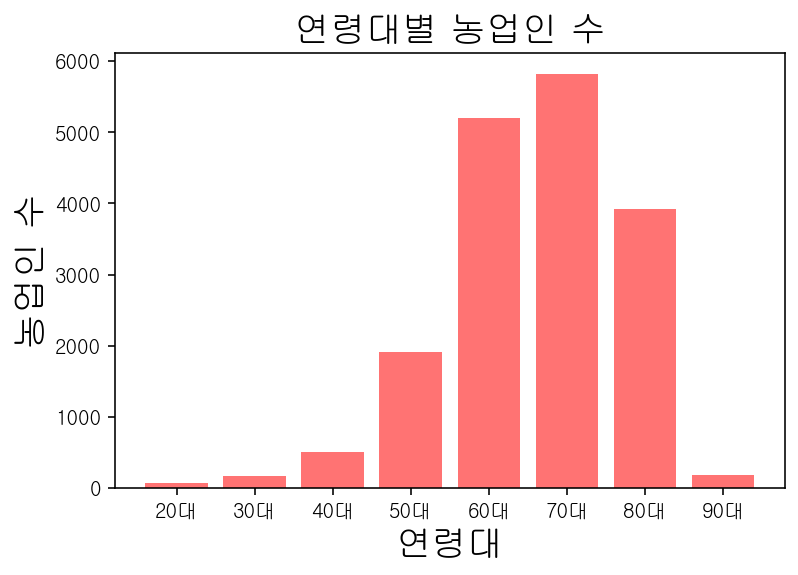

In [11]:
age = (df["q10"] // 10) * 10
df['age_N'] = age
age_ = df.groupby('age_N')['id'].count()

x = np.arange(8)
labels = ["20대", "30대", "40대", "50대", "60대", "70대", "80대", "90대"]

_=plt.bar(labels, age_, color = '#ff7373')
_=plt.title('연령대별 농업인 수', fontsize = 18)
_=plt.xlabel('연령대', fontsize = 18)
_=plt.ylabel('농업인 수', fontsize = 18)

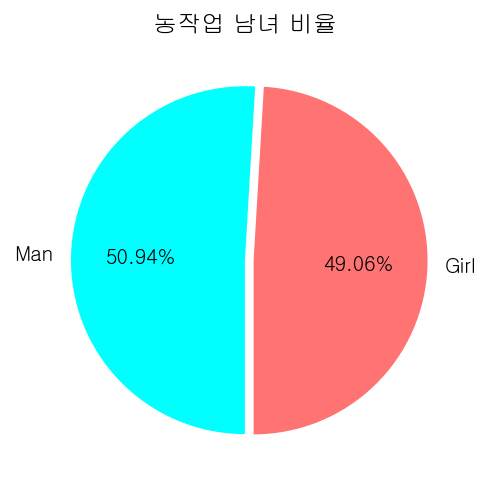

In [12]:
Man = 0
Girl = 0
for i in df["q9"]:
    if i == 1:
        Man += 1
    else:
        Girl += 1

d = [Man, Girl]
labels = ['Man', 'Girl']
colors = ['#00ffff', '#ff7373']
explode = [0, 0.05]
_=plt.pie(d, labels = labels, autopct = '%.2f%%', startangle = 270, counterclock = False, colors = colors, explode = explode)
_=plt.title('농작업 남녀 비율')
_=plt.show()

### 4.2 지역별 농업종류에 따른 손상 조사

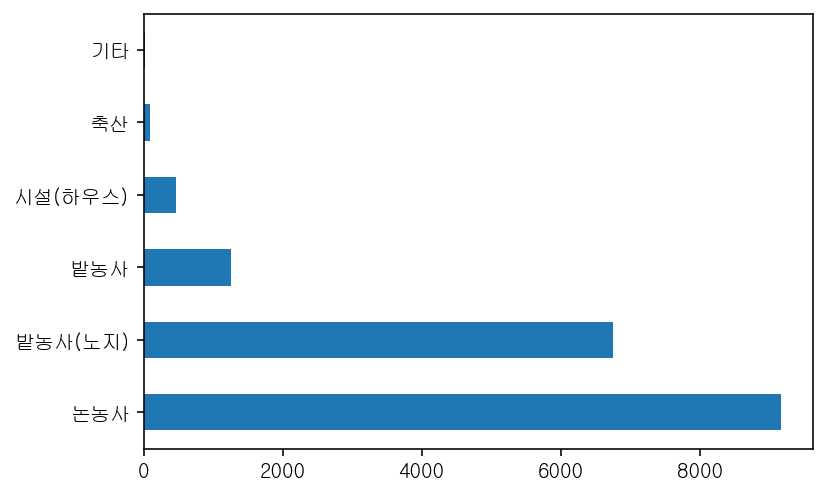

In [13]:
df3=df2["농업종류"].value_counts()
df3.plot.barh()

<Figure size 2880x2880 with 0 Axes>

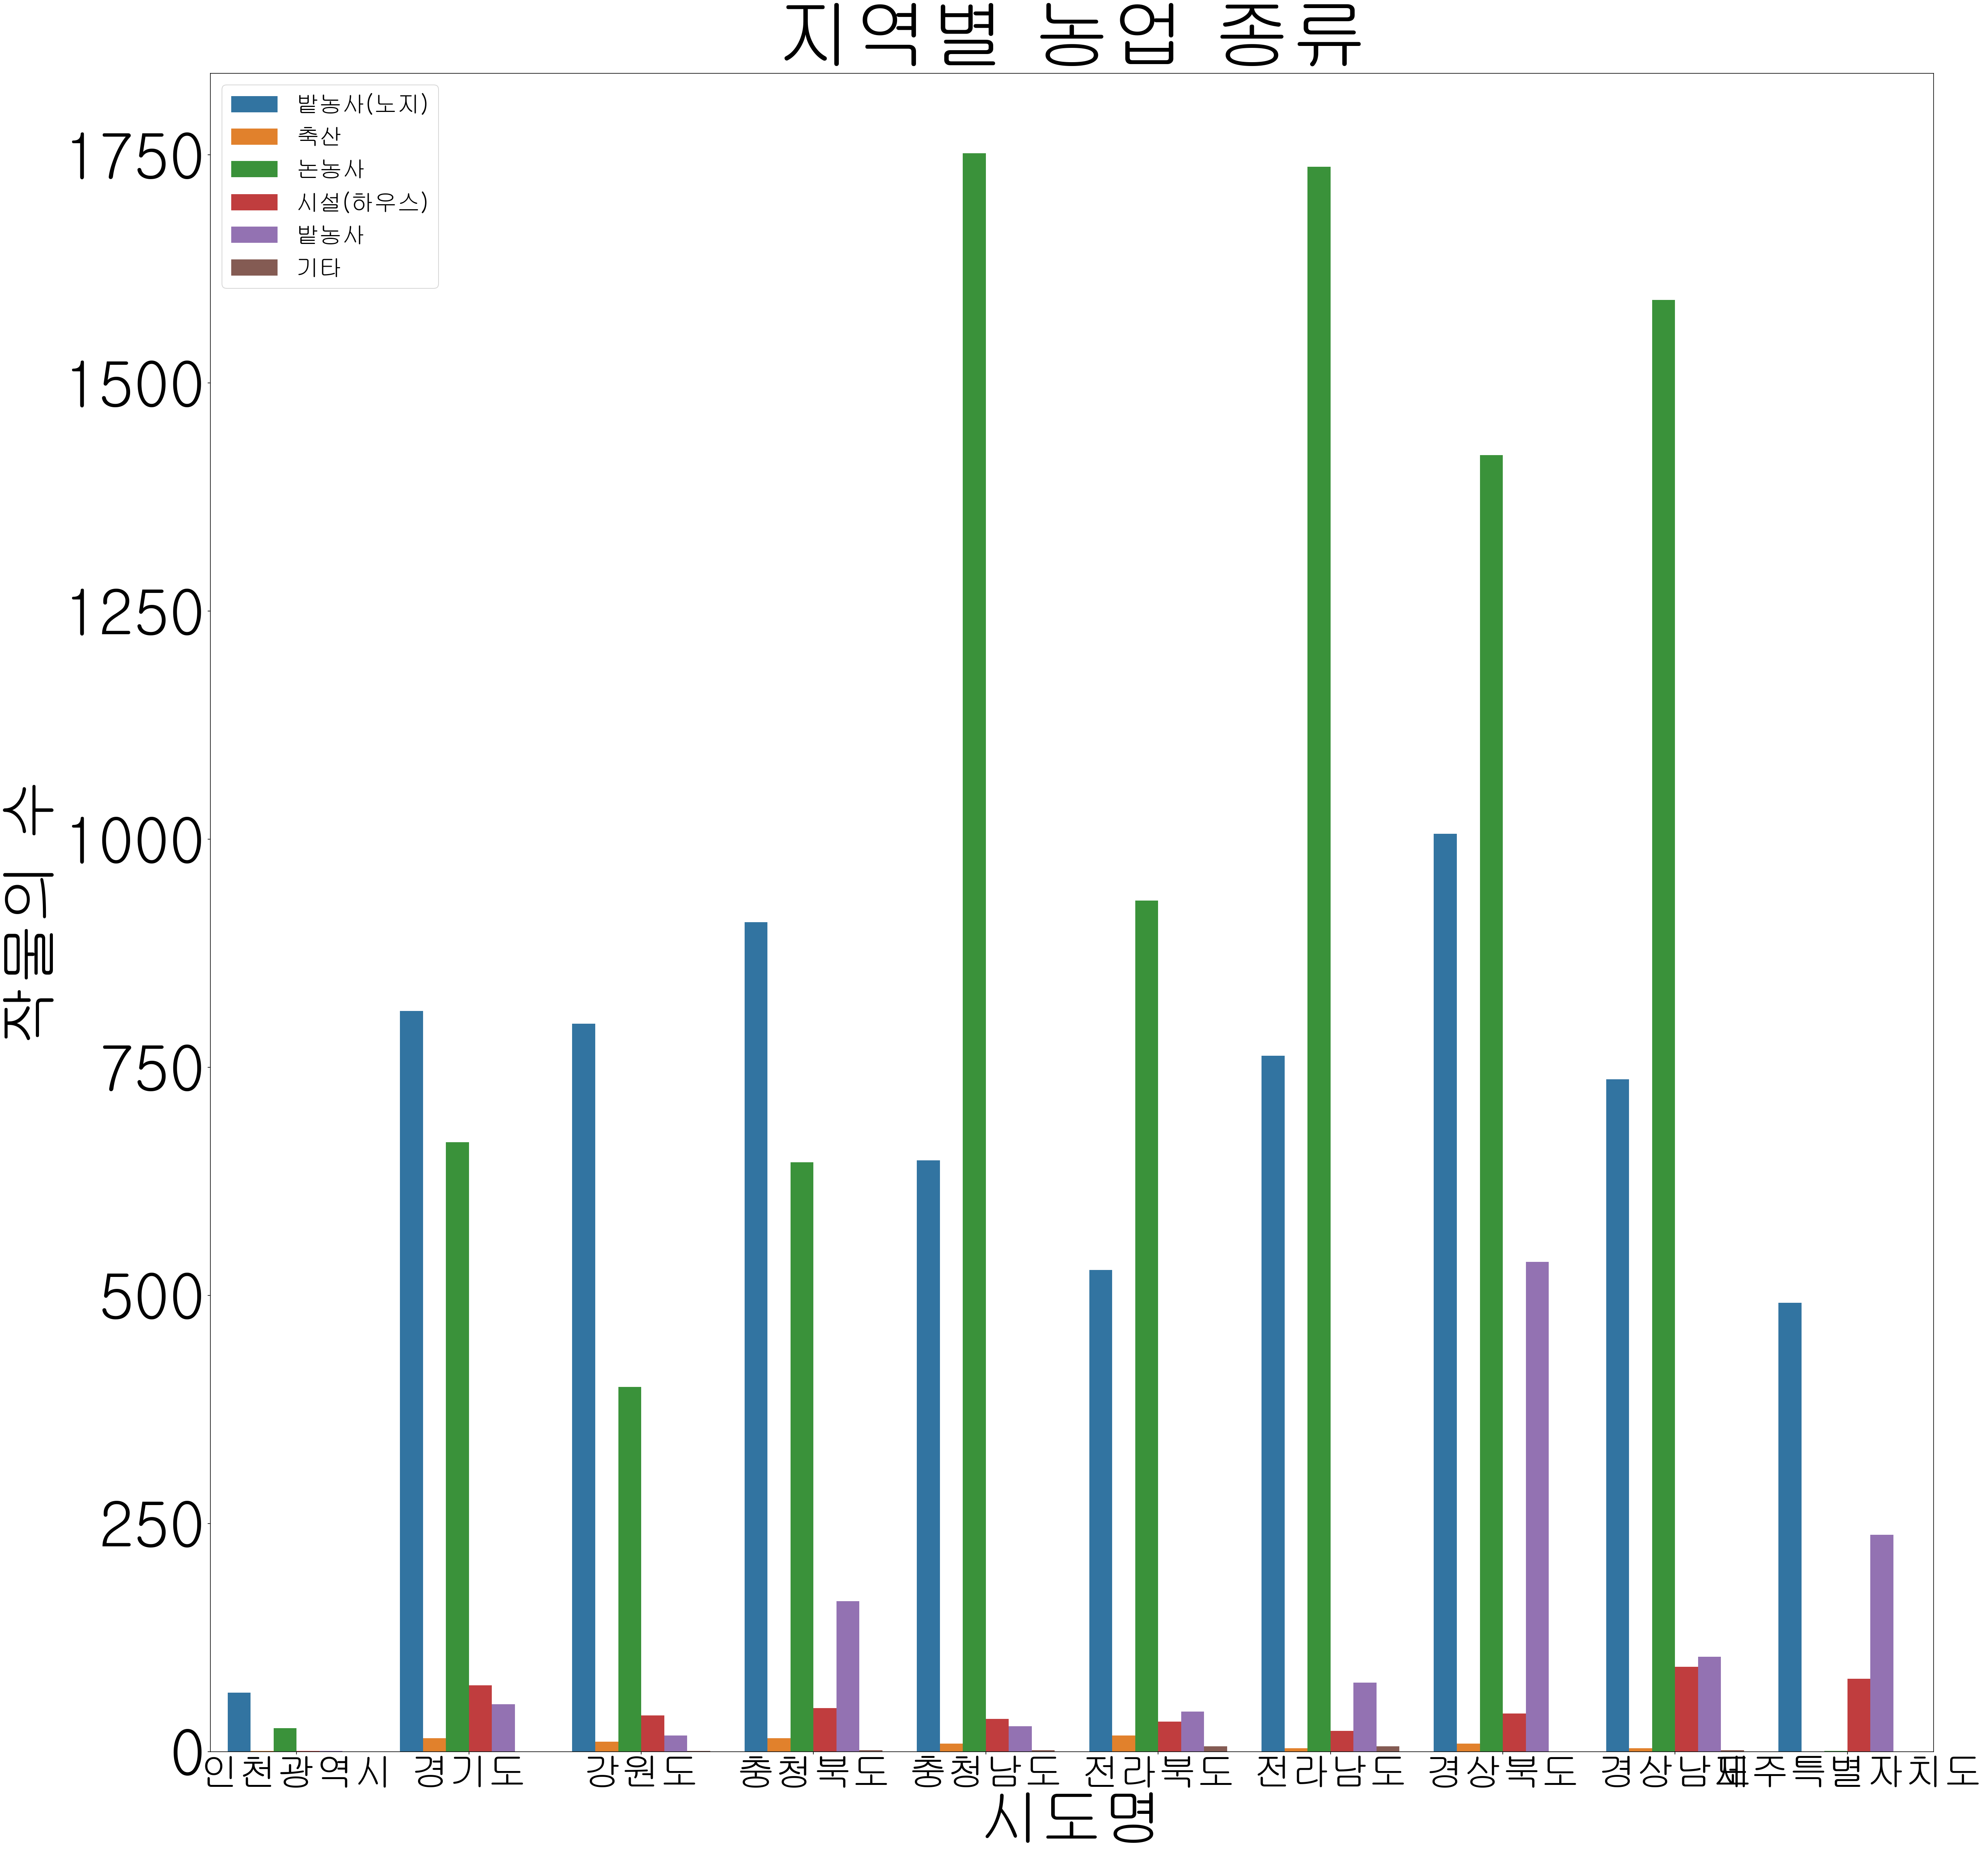

In [14]:
plt.figure(figsize=(40,40))
_=sns.countplot(data=df2, x="시도명",hue="농업종류")
_=plt.title('지역별 농업 종류', fontsize=100)
_=plt.xlabel('시도명', fontsize=80)
_=plt.ylabel('작물의 수', fontsize=80)
_=plt.legend( fontsize=30)
_=plt.xticks(fontsize =50)
_=plt.yticks(fontsize =80)

### 4.2 작물의 종류별/나이별 손상 여부비교

In [41]:
def function(row):
    if row["q13"] == 1:
        return "N"
    else :
        return "손상"

df['q13_N'] = df.apply(function, axis = 1)
df.head()

id    시도명 시군구명 읍면동명 행정리명  조사가구번호 주요작물  작목코드  논농사  q2_1_2  ...  aq9_1_1  \
0   1  인천광역시  강화군  선원면  냉정리       1   고추   2-3    2     NaN  ...      NaN   
1   2  인천광역시  강화군  선원면  냉정리       2   마늘  2-13    2     NaN  ...      NaN   
2   3  인천광역시  강화군  선원면  냉정리       3    소   5-6    2     NaN  ...      NaN   
3   4  인천광역시  강화군  선원면  냉정리       4  고구마   2-2    2     NaN  ...      NaN   
4   5  인천광역시  강화군  선원면  냉정리       5   고추   2-3    2     NaN  ...      NaN   

   aq9_1_1etc  aq10_1  aq11_1  re1  q1_1re  age  age2  age_N  q13_N  
0         NaN     NaN     NaN   경기       2   a3  경기a3     60      N  
1         NaN     NaN     NaN   경기       2   a4  경기a4     70      N  
2         NaN     NaN     NaN   경기       5   a3  경기a3     60      N  
3         NaN     NaN     NaN   경기       2   a3  경기a3     60      N  
4         NaN     NaN     NaN   경기       2   a4  경기a4     70      N  

[5 rows x 105 columns]

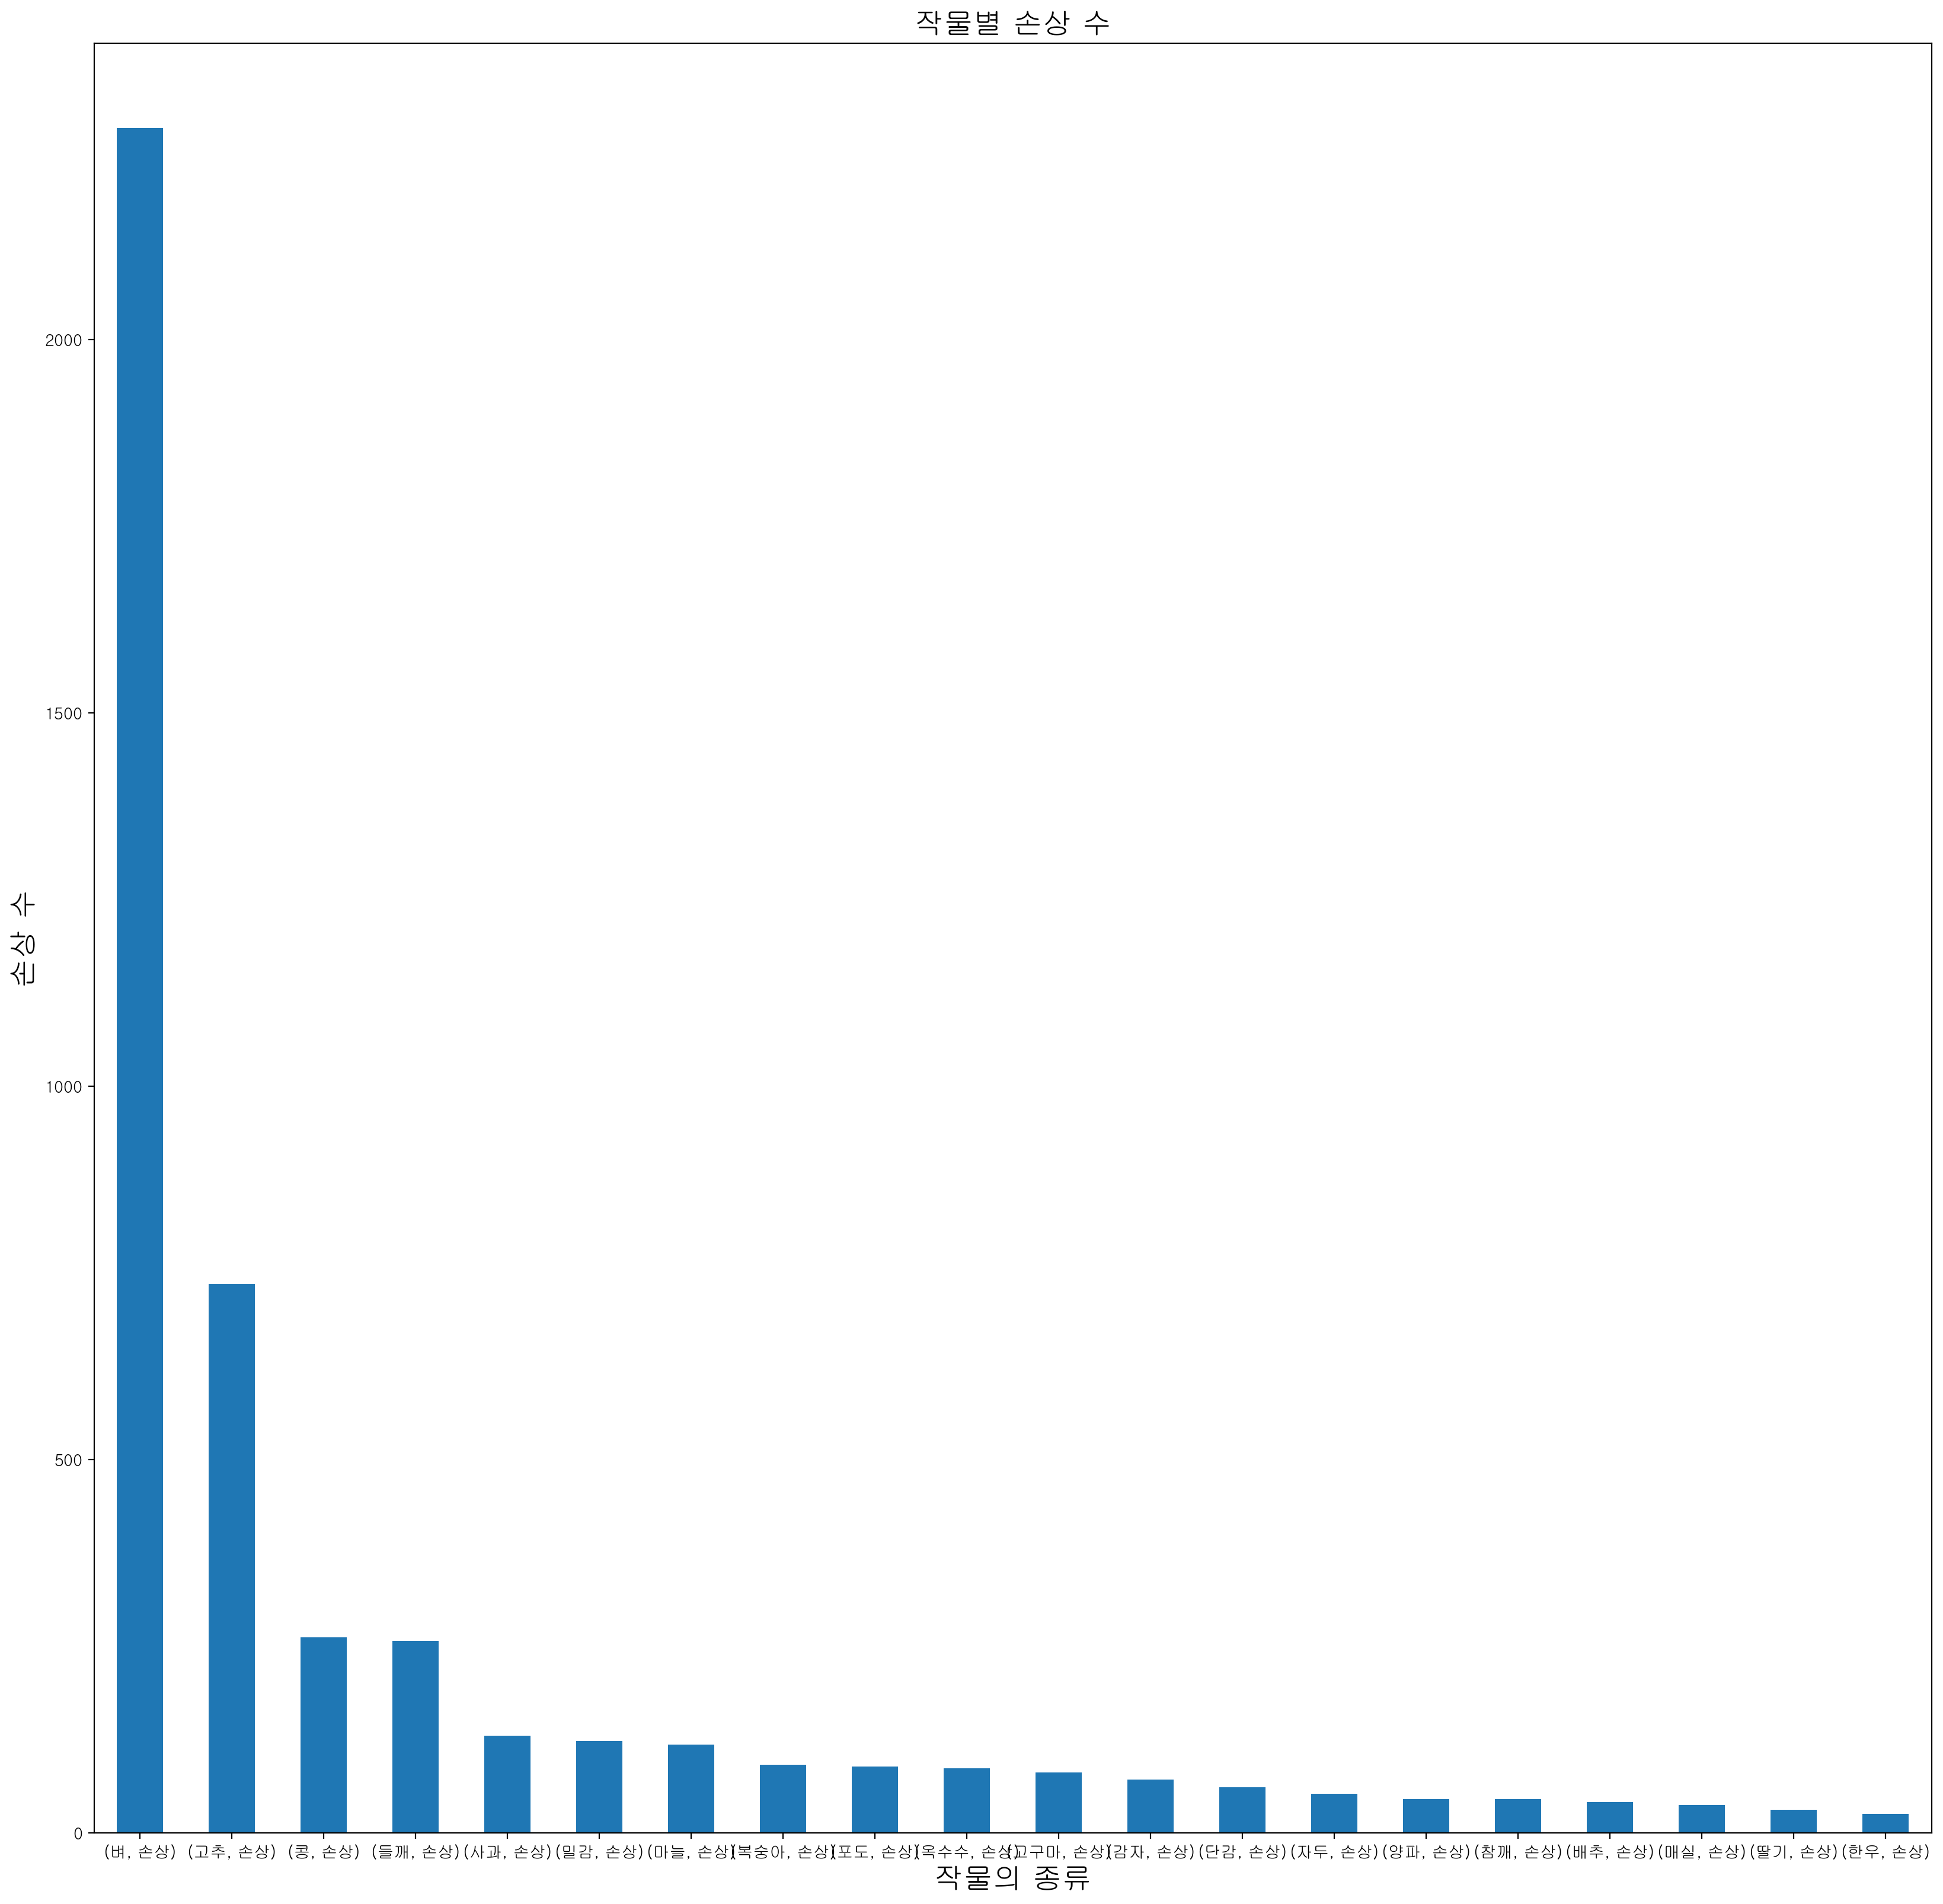

In [42]:
condition=(df.q13_N == "손상")
dp=df.loc[condition, ['주요작물','q13_N']]
ct=dp.groupby(['주요작물','q13_N'])['주요작물'].count()
ct_dop_row = ct.dropna(axis=0)
ct=ct_dop_row.sort_values(ascending=False).head(20)

fig=plt.figure(figsize=(20,20), dpi=100)
labels=[ct.index]
_=ct.plot.bar(rot=0)
_=plt.title('작물별 손상 수', fontsize = 18)
_=plt.xlabel('작물의 종류', fontsize = 18)
_=plt.ylabel('손상 수', fontsize = 18)

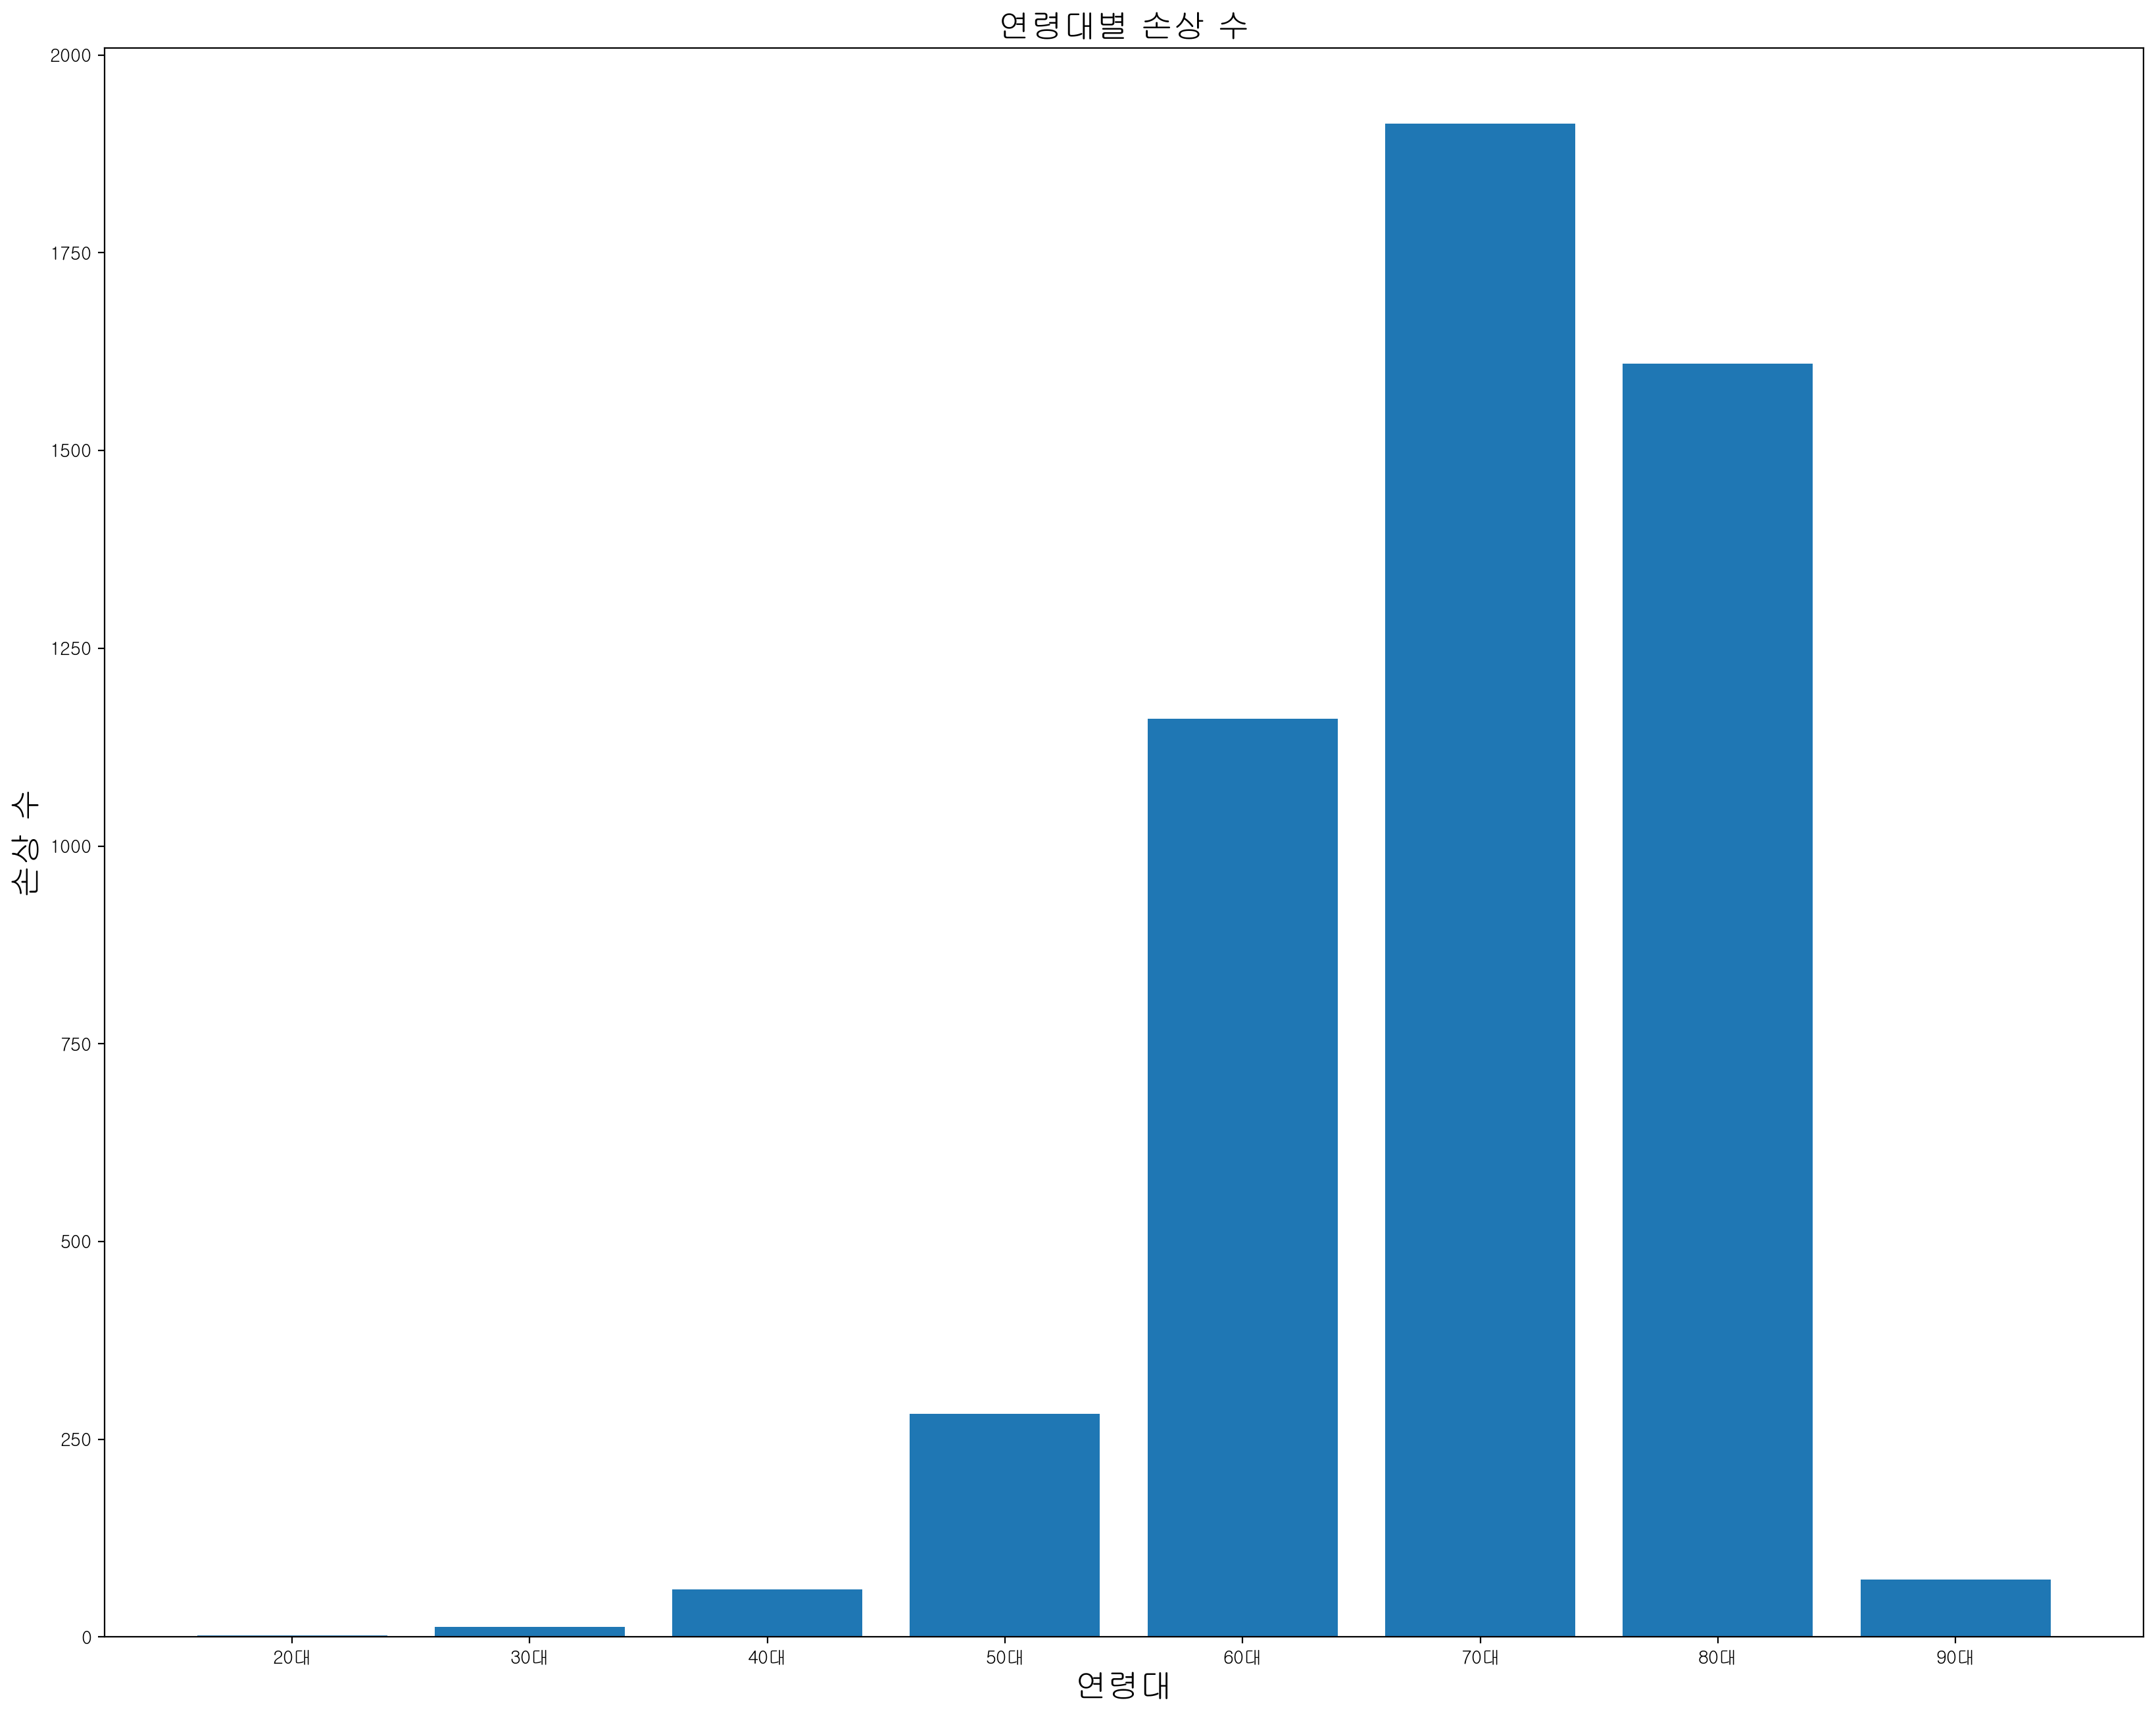

In [17]:
df0=df.loc[condition, ['age_N','q13_N']]
cr=df0.groupby(['age_N','q13_N'])['age_N'].count()
cr = cr.dropna(axis=0)

fig=plt.figure(figsize=(20,16),dpi=100)
labels = ["20대", "30대", "40대", "50대", "60대", "70대", "80대", "90대"]
_=plt.bar(labels, cr)
_=plt.title('연령대별 손상 수', fontsize = 18)
_=plt.xlabel('연령대', fontsize = 18)
_=plt.ylabel('손상 수', fontsize = 18)

<BarContainer object of 8 artists>

Text(0.5, 1.0, '연령대별 농업인 수')

Text(0.5, 0, '연령대')

Text(0, 0.5, '농업인 수')

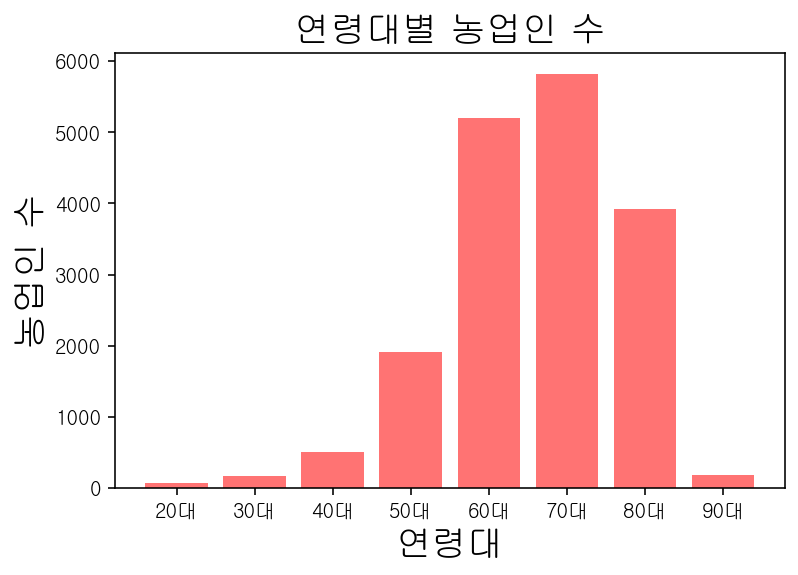

In [18]:
x = np.arange(8)
labels = ["20대", "30대", "40대", "50대", "60대", "70대", "80대", "90대"]

plt.bar(labels, age_, color = '#ff7373')
plt.title('연령대별 농업인 수', fontsize = 18)
plt.xlabel('연령대', fontsize = 18)
plt.ylabel('농업인 수', fontsize = 18)

### 4.3 농작업에 대한 위험 인지 여부와 그에 따른 손상조사.

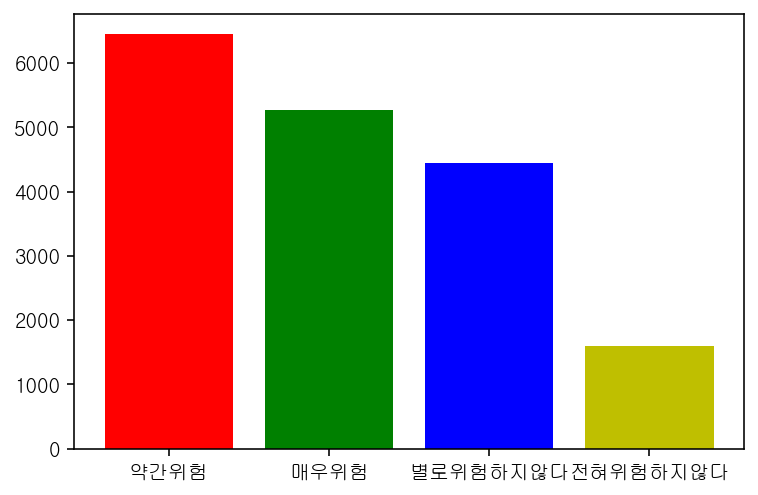

In [19]:
x = np.arange(4)
years = ['약간위험','매우위험','별로위험하지않다','전혀위험하지않다']
values = df["q20"].value_counts()

_=plt.bar(x, values,color=['r','g','b','y'])
_=plt.xticks(x, years)

_=plt.show()

<BarContainer object of 4 artists>

([<matplotlib.axis.XTick at 0x14072bd09d0>,
 [Text(0, 0, '약간위험'),
  Text(0, 0, '매우위험'),
  Text(0, 0, '별로위험하지않다'),
  Text(0, 0, '전혀위험하지않다')])

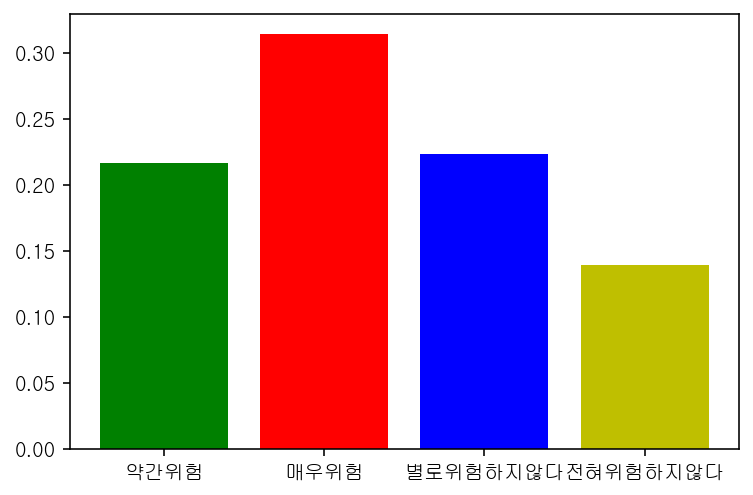

In [20]:
x = np.arange(4)
years = ['약간위험','매우위험','별로위험하지않다','전혀위험하지않다']
values = [193/893, 220/701 , 74/332 , 17/122]

plt.bar(x, values,color=['g','r','b','y']) 
plt.xticks(x, years)

plt.show()

### 4.4 농작업 손상에 가장 많은 영향을 끼치는 요인

7.0     87
6.0     77
4.0     57
10.0    48
8.0     48
5.0     45
3.0     41
9.0     37
11.0    24
12.0    18
2.0     13
1.0     10
Name: aq1_1, dtype: int64

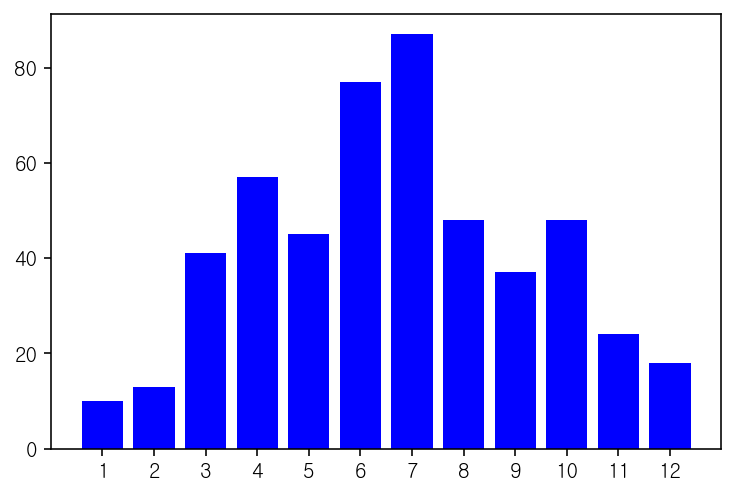

In [21]:
aq1_1=df["aq1_1"].value_counts() #발생 월
aq1_1

x = np.arange(1,13)
times = [1,2,3,4,5,6,7,8,9,10,11,12]
values = [10,13,41,57,45,77,87,48,37,48,24,18]
_=plt.bar(x, values, color='b') 
_=plt.xticks(x, times)
_=plt.show()

10.0    81
14.0    81
15.0    67
11.0    63
13.0    35
17.0    33
9.0     30
16.0    25
12.0    23
8.0     21
6.0     13
18.0    11
7.0     11
5.0      6
19.0     3
20.0     1
22.0     1
Name: aq2_1, dtype: int64

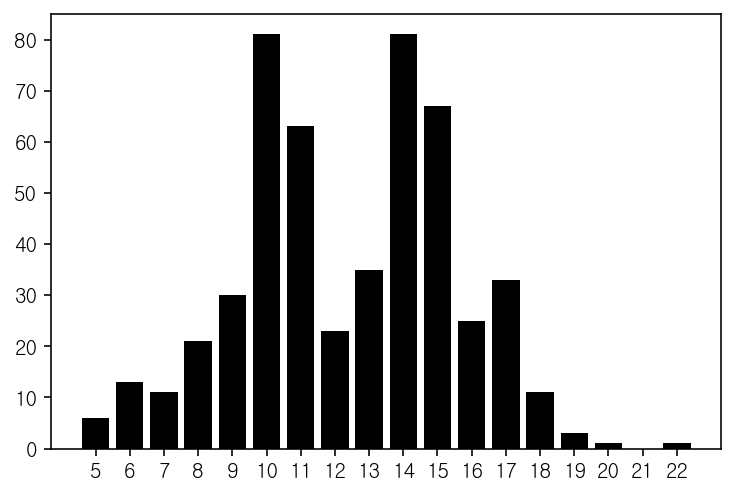

In [22]:
df["aq2_1"].value_counts()  #발생시간

x = np.arange(5,23)
times = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
values = [6,13,11,21,30,81,63,23,35,81,67,25,33,11,3,1,0,1]

_=plt.bar(x, values, color='k') 
_=plt.xticks(x, times)

_=plt.show()

1.0     386
6.0      48
2.0      30
7.0      13
10.0     11
5.0       8
4.0       5
3.0       4
Name: aq3_1, dtype: int64


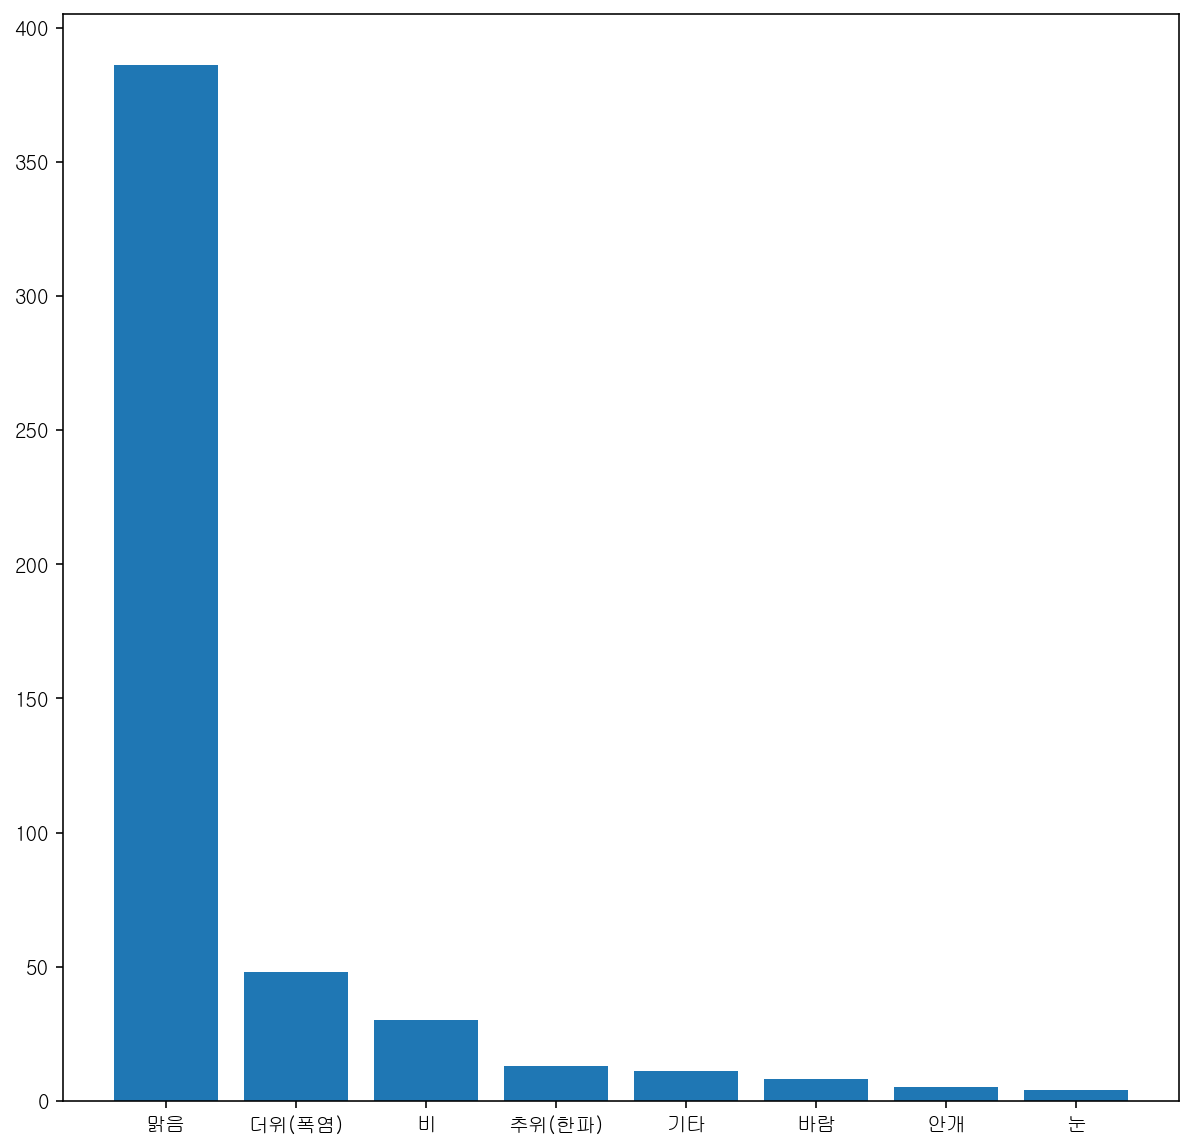

In [23]:
aq3_1=df["aq3_1"].value_counts()#발생 날씨
print(aq3_1)

x=np.arange(8)
labels = ["맑음","더위(폭염)","비","추위(한파)","기타","바람","안개","눈"]
_=plt.figure(figsize=(10,10))
_=plt.bar(x,aq3_1)
_=plt.xticks(x,labels)
_=plt.show

9.0     155
7.0      59
11.0     58
8.0      33
6.0      31
1.0      29
12.0     24
2.0      20
10.0     19
5.0      17
3.0      17
14.0     15
13.0      8
16.0      7
4.0       6
17.0      4
15.0      3
Name: aq4_1, dtype: int64


<BarContainer object of 17 artists>

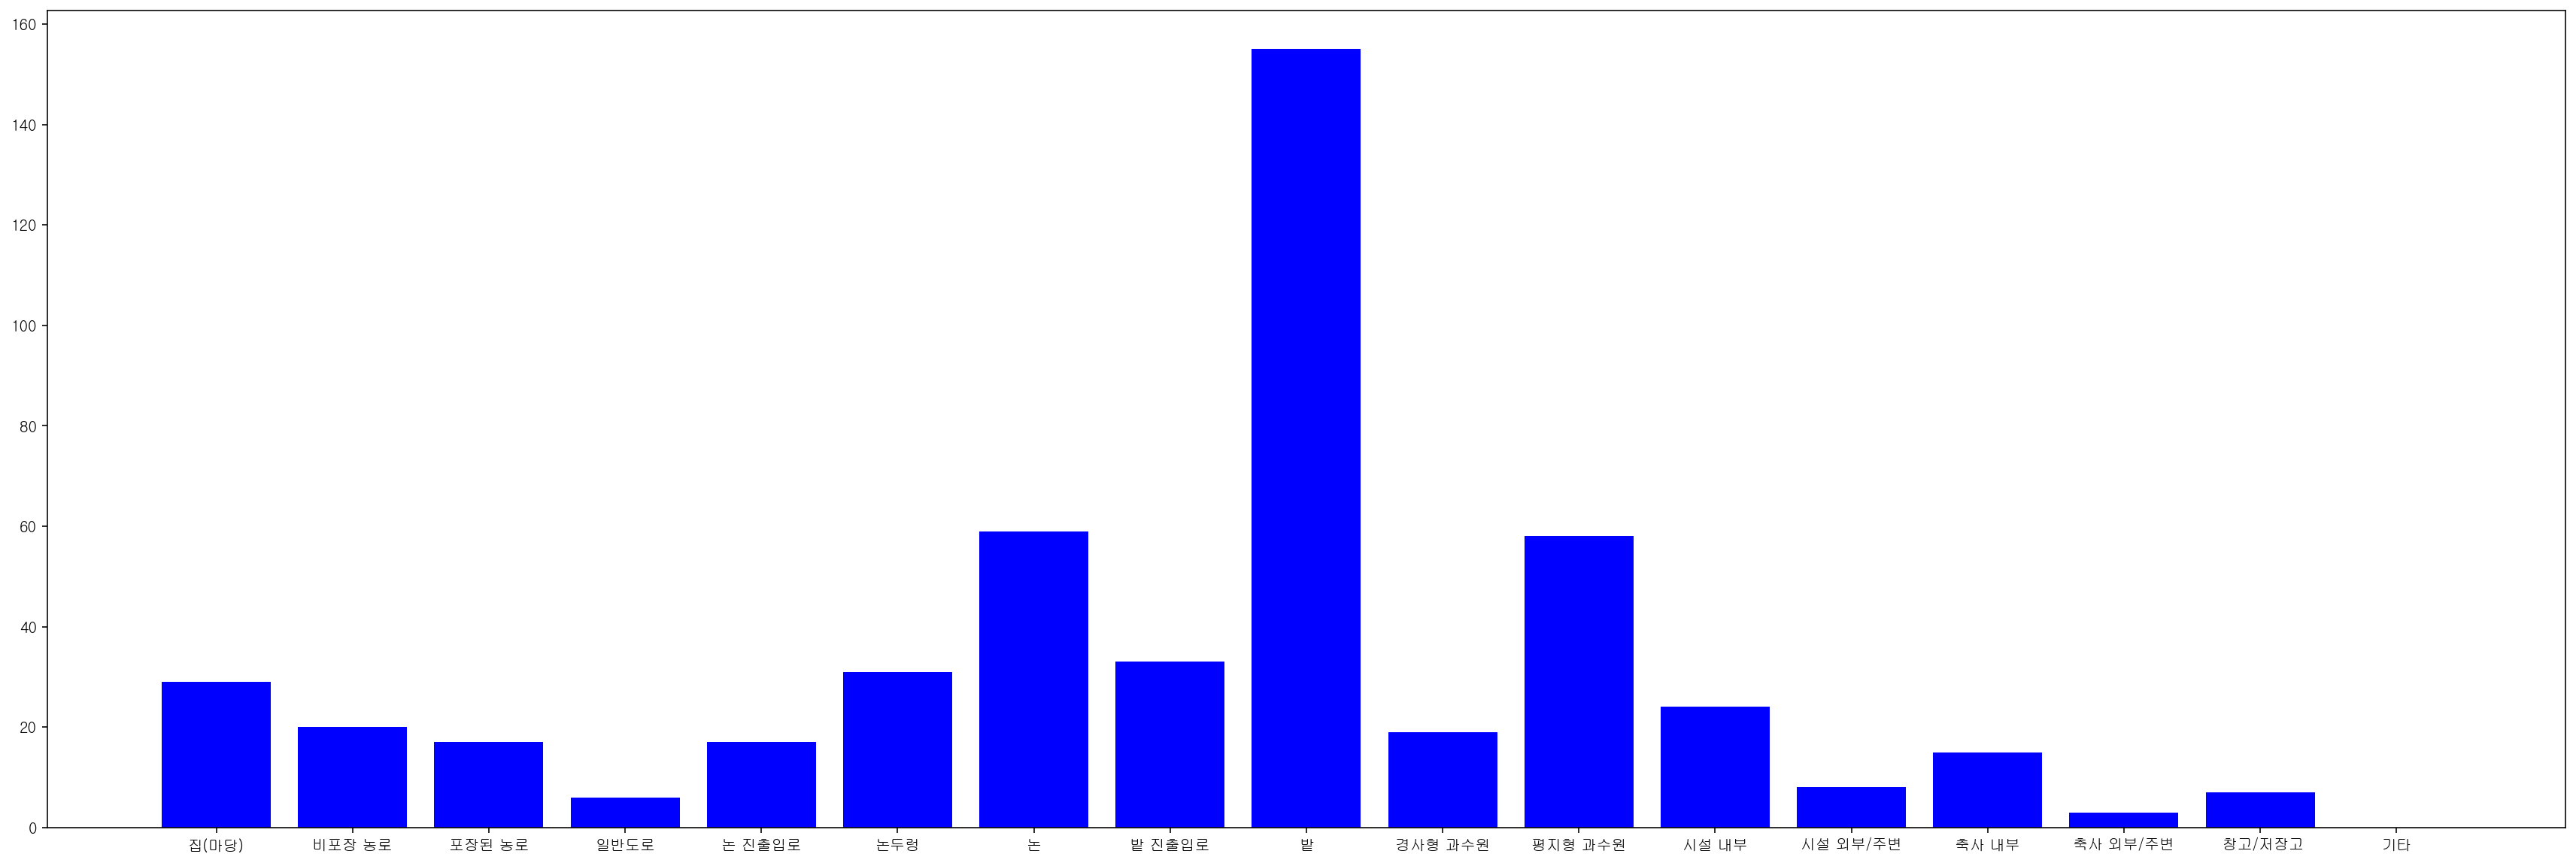

In [25]:
aq4_1=(df["aq4_1"].value_counts())  #발생장소
print(aq4_1)

x = np.arange(1,18)
times = ['집(마당)','비포장 농로' , '포장된 농로', '일반도로', '논 진출입로' , '논두렁', '논',
         '밭 진출입로','밭','경사형 과수원','평지형 과수원','시설 내부','시설 외부/주변','축사 내부',
        '축사 외부/주변',' 창고/저장고','기타']
values = [29,20,17,6,17,31,59,33,155,19,58,24,8,15,3,7,0]

_=plt.figure(figsize=(30, 10))
plt.bar(x, values, color='b') 
_=plt.xticks(x, times)
_=plt.show


2.0    328
4.0    100
3.0     20
1.0     19
5.0     14
8.0     13
7.0     10
9.0      1
Name: aq5_1, dtype: int64


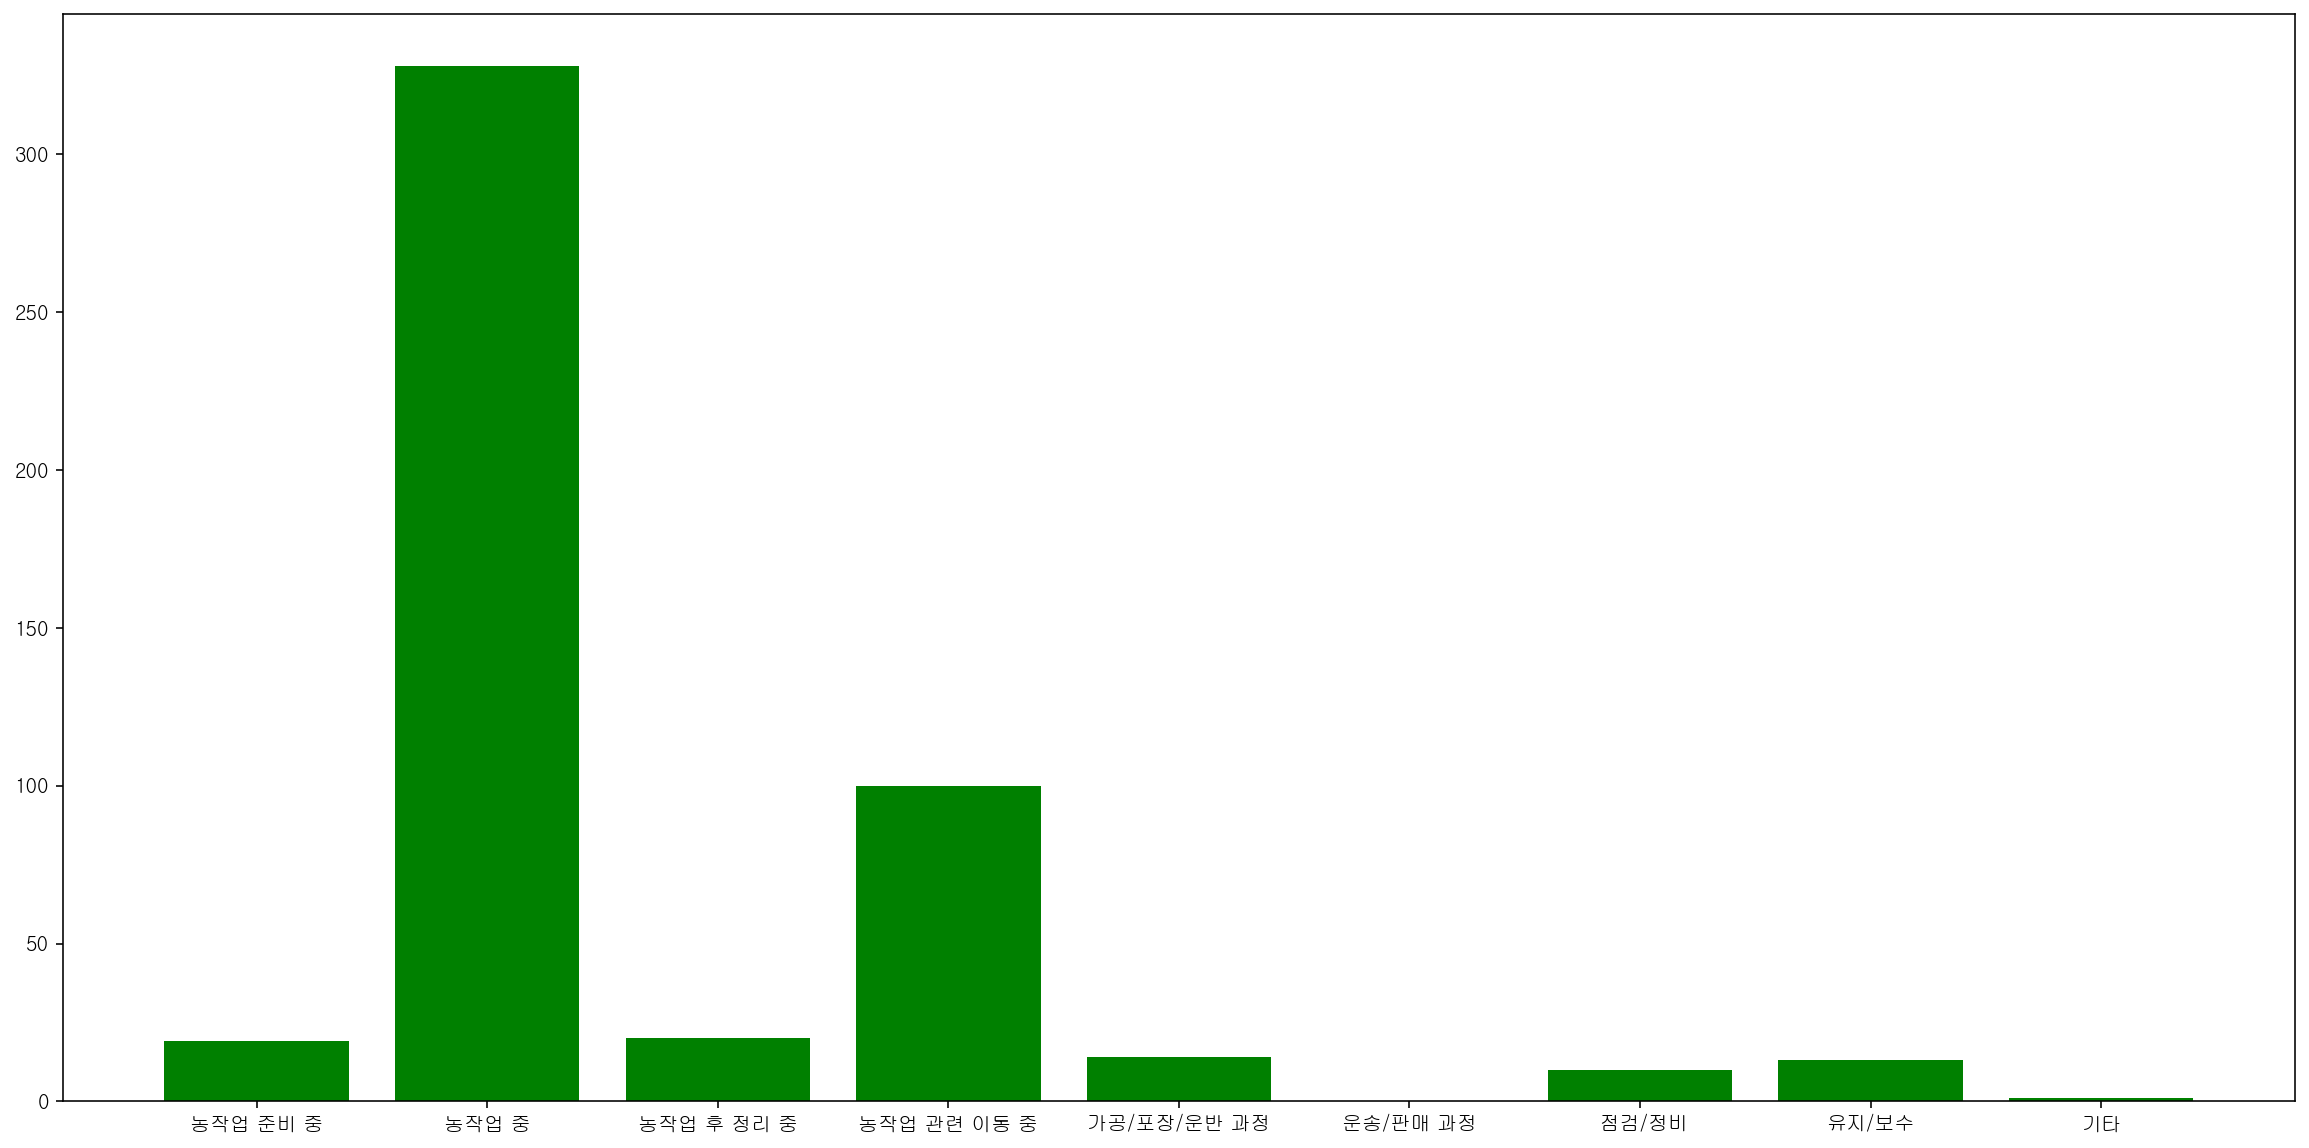

In [26]:
aq5_1=(df["aq5_1"].value_counts()) #발생상황
print(aq5_1)
x = np.arange(1,10)
times = ['농작업 준비 중','농작업 중','농작업 후 정리 중','농작업 관련 이동 중','가공/포장/운반 과정','운송/판매 과정',' 점검/정비'
        ,'유지/보수','기타']
values = [19,328,20,100,14,0,10,13,1]

_=plt.figure(figsize=(20, 10))
_=plt.bar(x, values, color='g') 
_=plt.xticks(x, times)
_=plt.show()

3.0     160
4.0      69
5.0      65
2.0      54
8.0      53
6.0      25
7.0      19
9.0      17
10.0     15
11.0     12
1.0       8
12.0      4
14.0      2
13.0      2
Name: aq6_1, dtype: int64


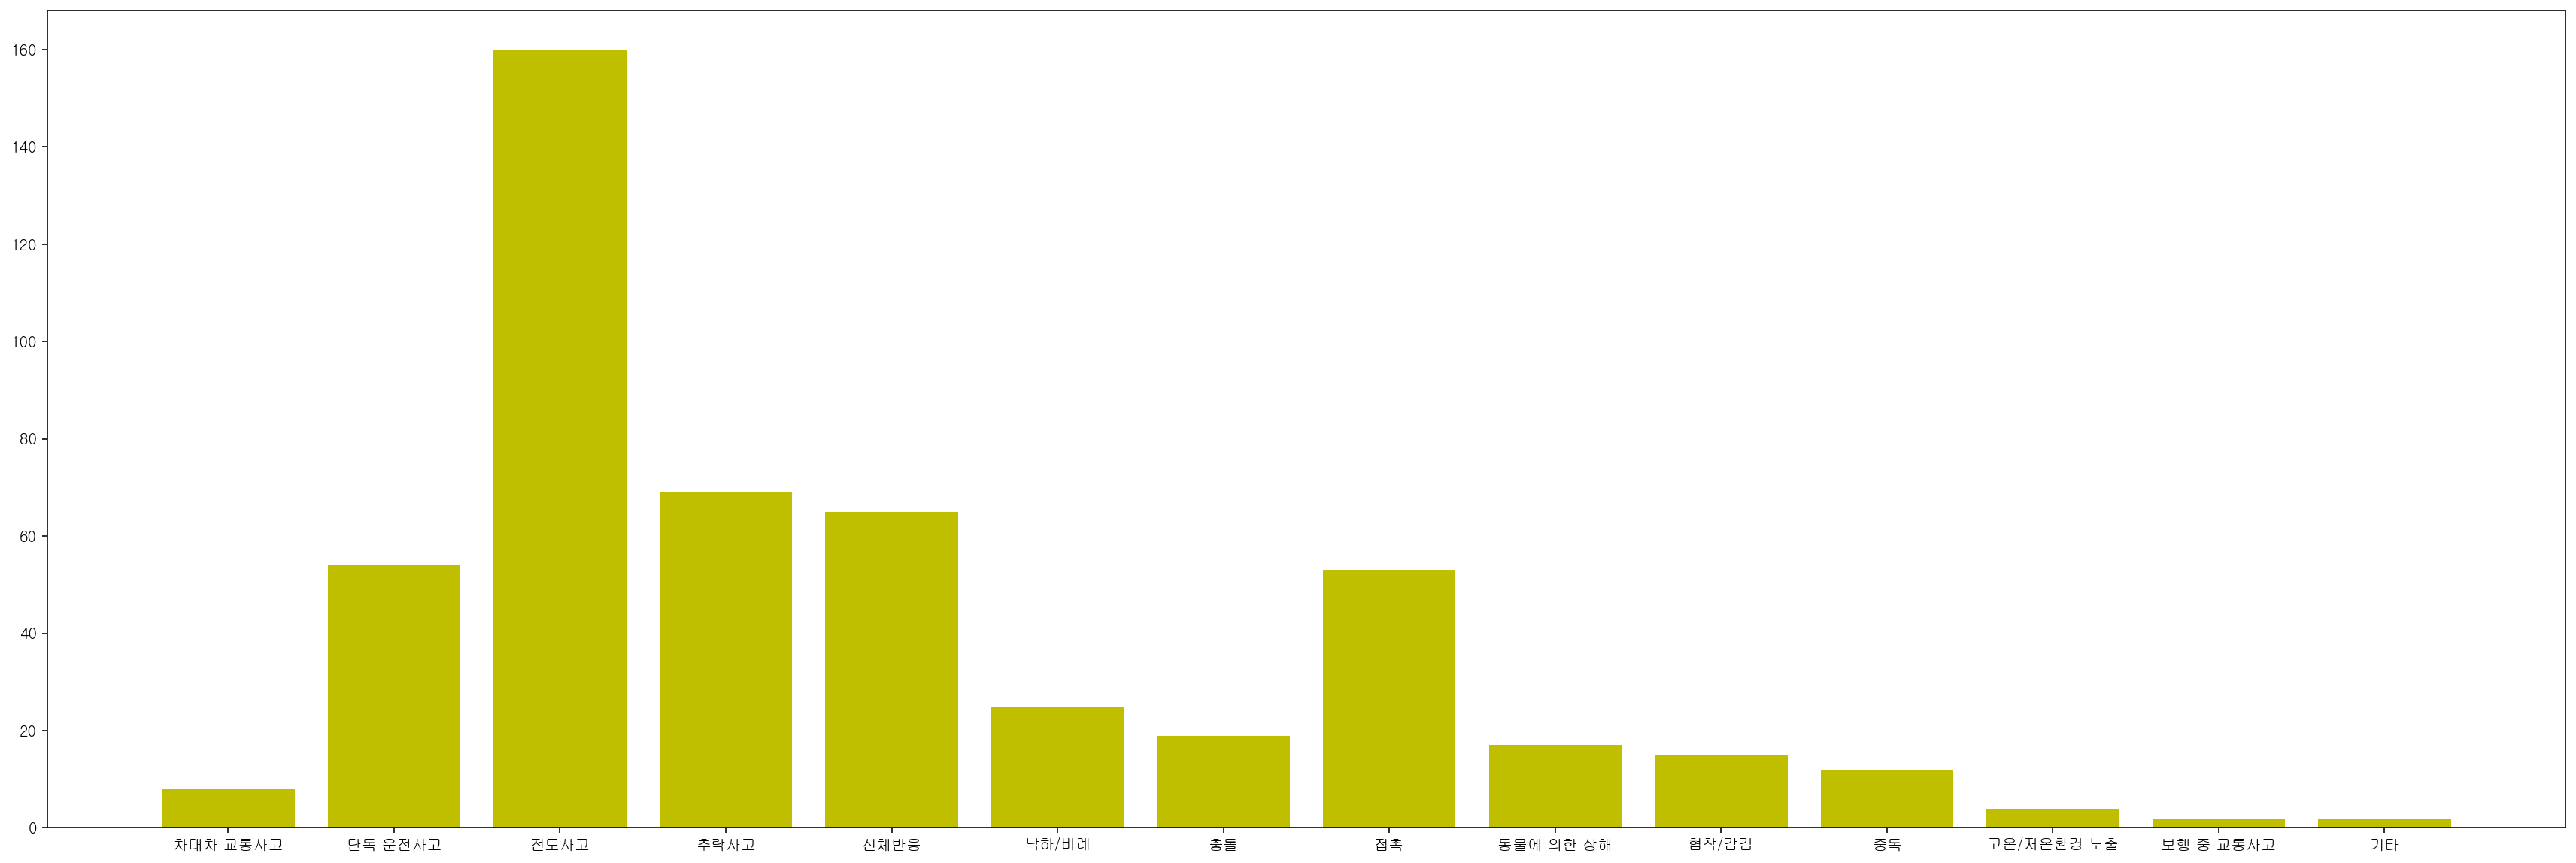

In [27]:
aq6_1=(df["aq6_1"].value_counts())  #발생원인
print(aq6_1)
x = np.arange(1,15)
times = ['차대차 교통사고','단독 운전사고','전도사고','추락사고','신체반응','낙하/비례','충돌','접촉','동물에 의한 상해','협착/감김','중독'
        ,'고온/저온환경 노출','보행 중 교통사고','기타']
values = [8,54,160,69,65,25,19,53,17,15,12,4,2,2]

_=plt.figure(figsize=(30, 10))
_=plt.bar(x, values, color='y') 
_=plt.xticks(x, times)
_=plt.show()

### 4.5 농작업중 발생하는 사고 및 중독으로 인해 다친 부위 조사

+ 최근 1년동안 치료를 받은 사람 중 농작업과 관련되어 치료 또는 일을 못한 농업인의 수는 504명으로 집계된다.
+ 이는 한해동안 치료를 받은 사람 중 24.61%로 나타난다.
+ 또한 이들 중 다치는 부위가 고루 분포되어 있으며, 대표적으로 척추와 다리, 손가락순으로 많이 다친다는 결과를 가져올 수 있다.

In [28]:
q = 0
for i in df['q32']:
    if i == 2:
        q += 1
print(q)

2048


In [29]:
# t, p, o, y 순으로 농작업관련O, 농작업관련X, 다른 사람의 폭력, 의도적인 자해로 구분한다.
t = 0
p = 0
o = 0
y = 0

for i in df['q32_1']:
    if i == 1:
        t += 1
    elif i == 2:
        p += 1
    elif i == 3:
        o += 1
    elif i == 4:
        y += 1
print(t)
print(p)
print(o)
print(y)

504
1543
1
0


In [30]:
# 농작업과 관련된 사고 및 중독으로 인해 일을 중단하거나, 치료를 받은 사람의 비율
(504/2048) * 100

24.609375

In [31]:
# 작년 한해동안 사고/중독으로 치료를 받은 사람은 전체 중 2048명이다. 
# 즉, 11.53%는 사고/중독으로 일을 쉬거나 치료를 받았다.
count = 0
counta = 0

for i in df['q32']:
    if i == 2:
        count += 1
    else:
        counta += 1
        
print("사고/중독으로 치료를 받은 사람의 수:",count)
print("사고/중독으로 치료를 받지 않은 사람의 수:",counta)

사고/중독으로 치료를 받은 사람의 수: 2048
사고/중독으로 치료를 받지 않은 사람의 수: 15722


aq8_1_1
1.0     40
2.0     31
3.0     15
4.0     38
5.0      5
6.0      7
7.0     17
8.0     21
9.0     88
10.0     3
11.0    22
12.0    14
13.0     4
14.0    36
15.0     8
16.0     3
17.0    12
18.0    10
19.0     1
20.0     3
22.0    98
23.0    18
24.0    11
dtype: int64

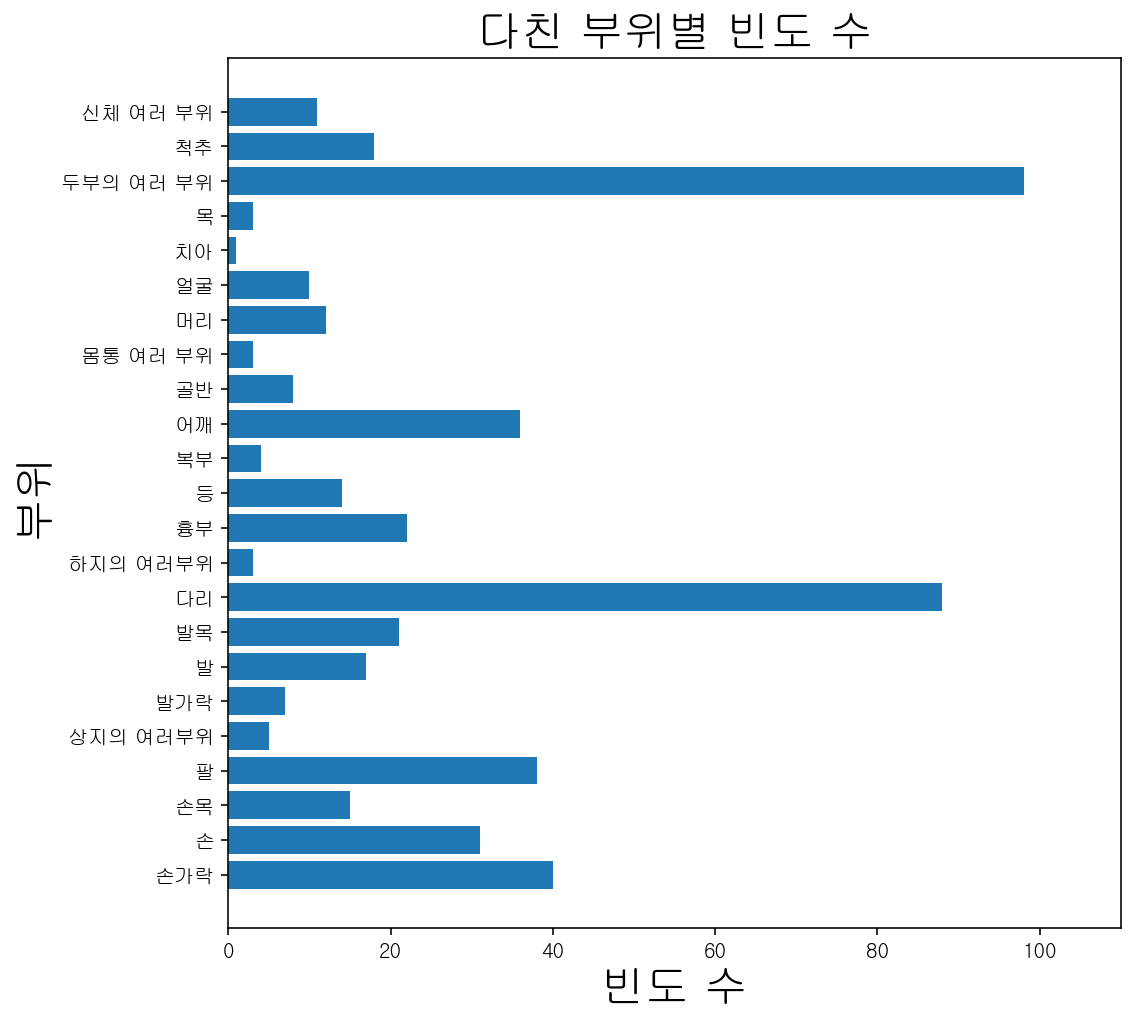

In [32]:
y = df.groupby(['aq8_1_1']).size()
y
label = ['손가락', '손', '손목', '팔', '상지의 여러부위', '발가락', '발', '발목', '다리', '하지의 여러부위', '흉부', '등', '복부', '어깨', '골반', '몸통 여러 부위', '머리', '얼굴', '치아', '목', '두부의 여러 부위', '척추', '신체 여러 부위']
fig = plt.figure(figsize=(8,8))
_=plt.xlim(0,110)
_=plt.barh(label,y)
_=plt.title('다친 부위별 빈도 수', fontsize = 22)
_=plt.xlabel('빈도 수', fontsize = 22)
_=plt.ylabel('부위', fontsize = 22)
_=plt.show()

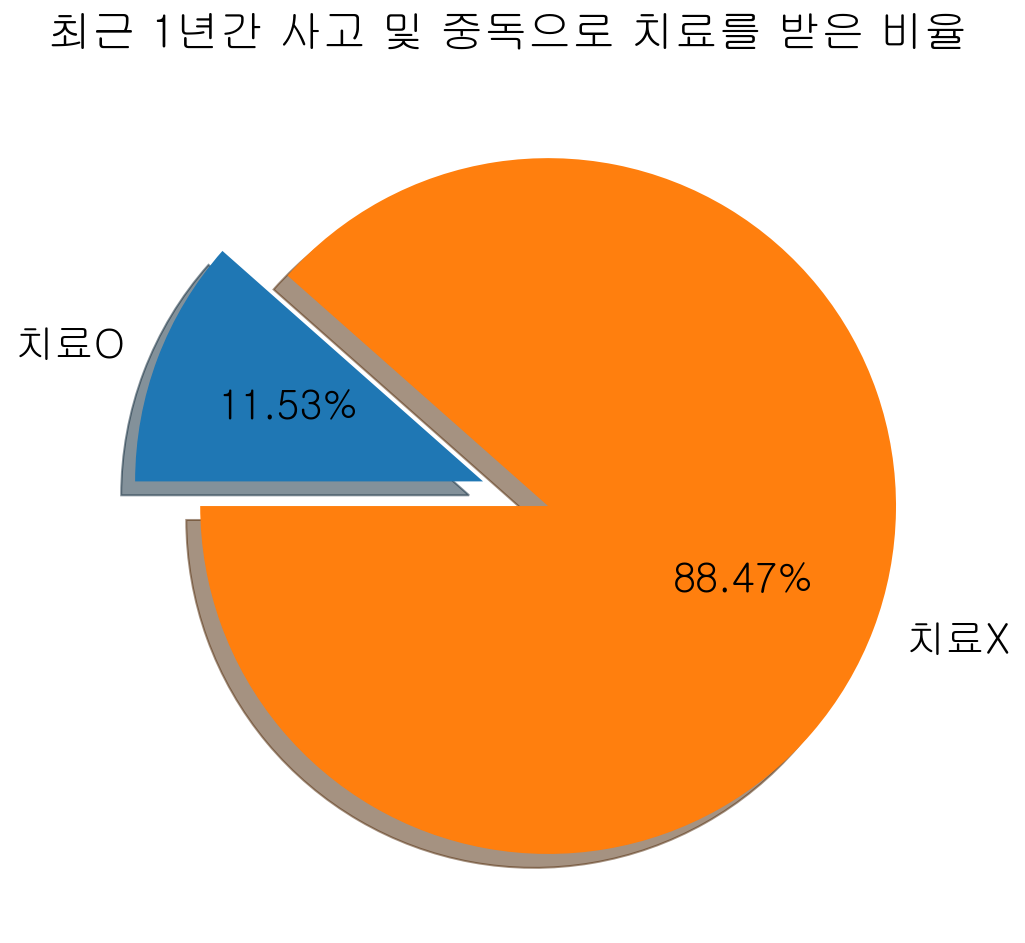

In [33]:
fig = plt.figure(figsize=(8,8))
d = [count, counta]
labels = ['치료O', '치료X']
explode = [0.1, 0.1]
_=plt.pie(d, labels= labels, autopct = '%.2f%%', startangle = 180, counterclock = False, explode = explode, shadow = True,  textprops={'fontsize': 20})
_=plt.title('최근 1년간 사고 및 중독으로 치료를 받은 비율 ', fontsize = 22)
_=plt.show()

In [34]:
data=df
data.loc[(data.aq8_1_1 ==1), 'aq8_1_1']=5
data.loc[(data.aq8_1_1 ==2), 'aq8_1_1']=5
data.loc[(data.aq8_1_1 ==3), 'aq8_1_1']=5
data.loc[(data.aq8_1_1 ==4), 'aq8_1_1']=5


data.loc[(data.aq8_1_1 ==6), 'aq8_1_1']=10
data.loc[(data.aq8_1_1 ==7), 'aq8_1_1']=10
data.loc[(data.aq8_1_1 ==8), 'aq8_1_1']=10
data.loc[(data.aq8_1_1 ==9), 'aq8_1_1']=10

data.loc[(data.aq8_1_1 ==11), 'aq8_1_1']=16
data.loc[(data.aq8_1_1 ==12), 'aq8_1_1']=16
data.loc[(data.aq8_1_1 ==13), 'aq8_1_1']=16
data.loc[(data.aq8_1_1 ==14), 'aq8_1_1']=16
data.loc[(data.aq8_1_1 ==15), 'aq8_1_1']=16

data.loc[(data.aq8_1_1 ==17), 'aq8_1_1']=22
data.loc[(data.aq8_1_1 ==18), 'aq8_1_1']=22
data.loc[(data.aq8_1_1 ==19), 'aq8_1_1']=22
data.loc[(data.aq8_1_1 ==20), 'aq8_1_1']=22

data.loc[(data.aq8_1_1 ==23), 'aq8_1_1']=24

In [35]:
# 상지, 하지, 몸통, 두부, 기타(척추) 순으로 q, z, x, c, v로 나타낸다.
q = 0
z = 0
x = 0
c = 0
v = 0
for i, p in zip(data['q32_1'],data['aq8_1_1']):
    if i == 1 and p == 5:
        q += 1
    elif i == 1 and p == 10:
        z += 1
    elif i == 1 and p == 16:
        x += 1
    elif i == 1 and p == 22:
        c += 1
    elif  i == 1 and p == 24:
        v += 1
print("상지 다친 사람의 수:",q)
print("하지 다친 사람의 수:",z)
print("몸통 다친 사람의 수:",x)
print("두부 다친 사람의 수:",c)
print("기타(척추) 다친 사람의 수:",v)
print("총 합:",q + z + x + c + v)

상지 다친 사람의 수: 129
하지 다친 사람의 수: 136
몸통 다친 사람의 수: 87
두부 다친 사람의 수: 123
기타(척추) 다친 사람의 수: 29
총 합: 504


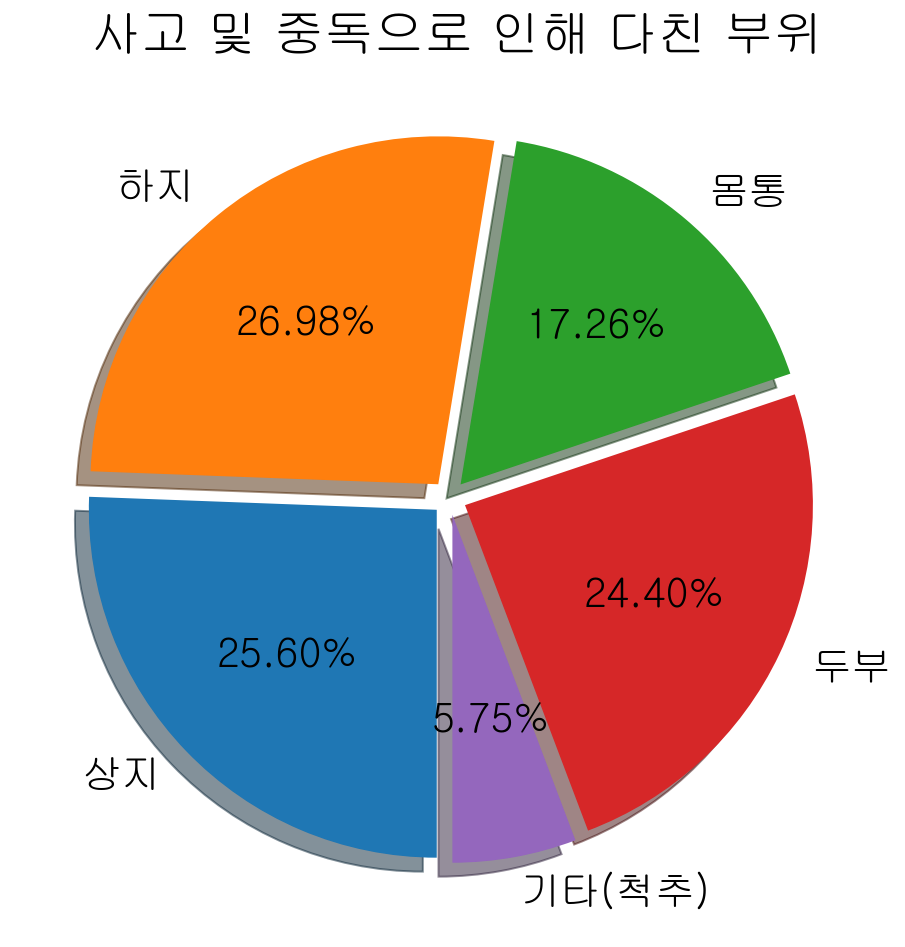

In [36]:
fig = plt.figure(figsize=(8,8))
d = [q, z,x,c,v]
labels = ['상지', '하지', '몸통', '두부', '기타(척추)']
explode = [0.05, 0.05, 0.05, 0.05, 0.05]
_=plt.pie(d, labels= labels, autopct = '%.2f%%', startangle = 270, counterclock = False, explode = explode, shadow = True,  textprops={'fontsize': 20})
_=plt.title(' 사고 및 중독으로 인해 다친 부위', fontsize = 25)
_=plt.show()

### 4.6 교통사고를 예방할 수 있는 시설/장치들이 잘 갖추어져 있는 것과 잘 갖추어져 있지 않은 것에 따른 조사

In [37]:
data1=df
columns=['시도명','신호등','횡단보도','과속방지턱','안전표지판','가로등','과속단속카메라']

data1=data1[columns].copy()
data1

시도명  신호등  횡단보도  과속방지턱  안전표지판  가로등  과속단속카메라
0        인천광역시    5     5      5      5    5        5
1        인천광역시    2     2      2      2    2        2
2        인천광역시    3     3      3      3    3        3
3        인천광역시    2     2      2      2    2        2
4        인천광역시    2     2      2      2    2        2
...        ...  ...   ...    ...    ...  ...      ...
17765  제주특별자치도    3     3      2      2    4        4
17766  제주특별자치도    3     3      4      4    3        3
17767  제주특별자치도    2     2      2      3    2        2
17768  제주특별자치도    2     2      2      3    2        2
17769  제주특별자치도    2     3      3      2    2        3

[17770 rows x 7 columns]

In [38]:
data1["신호등"] = data1["신호등"].replace(1, "매우잘갖추어짐")
data1["신호등"] = data1["신호등"].replace(2, "잘갖추어짐")
data1["신호등"] = data1["신호등"].replace(3, "부족")
data1["신호등"] = data1["신호등"].replace(4, "매우부족")
data1["신호등"] = data1["신호등"].replace(5, "해당없음")

data1["횡단보도"] = data1["횡단보도"].replace(1, "매우잘갖추어짐")
data1["횡단보도"] = data1["횡단보도"].replace(2, "잘갖추어짐")
data1["횡단보도"] = data1["횡단보도"].replace(3, "부족")
data1["횡단보도"] = data1["횡단보도"].replace(4, "매우부족")
data1["횡단보도"] = data1["횡단보도"].replace(5, "해당없음")

data1["과속방지턱"] = data1["과속방지턱"].replace(1, "매우잘갖추어짐")
data1["과속방지턱"] = data1["과속방지턱"].replace(2, "잘갖추어짐")
data1["과속방지턱"] = data1["과속방지턱"].replace(3, "부족")
data1["과속방지턱"] = data1["과속방지턱"].replace(4, "매우부족")
data1["과속방지턱"] = data1["과속방지턱"].replace(5, "해당없음")

data1["안전표지판"] = data1["안전표지판"].replace(1, "매우잘갖추어짐")
data1["안전표지판"] = data1["안전표지판"].replace(2, "잘갖추어짐")
data1["안전표지판"] = data1["안전표지판"].replace(3, "부족")
data1["안전표지판"] = data1["안전표지판"].replace(4, "매우부족")
data1["안전표지판"] = data1["안전표지판"].replace(5, "해당없음")

data1["가로등"] = data1["가로등"].replace(1, "매우잘갖추어짐")
data1["가로등"] = data1["가로등"].replace(2, "잘갖추어짐")
data1["가로등"] = data1["가로등"].replace(3, "부족")
data1["가로등"] = data1["가로등"].replace(4, "매우부족")
data1["가로등"] = data1["가로등"].replace(5, "해당없음")

data1["과속단속카메라"] = data1["과속단속카메라"].replace(1, "매우잘갖추어짐")
data1["과속단속카메라"] = data1["과속단속카메라"].replace(2, "잘갖추어짐")
data1["과속단속카메라"] = data1["과속단속카메라"].replace(3, "부족")
data1["과속단속카메라"] = data1["과속단속카메라"].replace(4, "매우부족")
data1["과속단속카메라"] = data1["과속단속카메라"].replace(5, "해당없음")

data1.head()

시도명    신호등   횡단보도  과속방지턱  안전표지판    가로등 과속단속카메라
0  인천광역시   해당없음   해당없음   해당없음   해당없음   해당없음    해당없음
1  인천광역시  잘갖추어짐  잘갖추어짐  잘갖추어짐  잘갖추어짐  잘갖추어짐   잘갖추어짐
2  인천광역시     부족     부족     부족     부족     부족      부족
3  인천광역시  잘갖추어짐  잘갖추어짐  잘갖추어짐  잘갖추어짐  잘갖추어짐   잘갖추어짐
4  인천광역시  잘갖추어짐  잘갖추어짐  잘갖추어짐  잘갖추어짐  잘갖추어짐   잘갖추어짐

In [39]:
data1["신호등"].value_counts()
data1["횡단보도"].value_counts()
data1["과속방지턱"].value_counts()
data1["안전표지판"].value_counts()
data1["가로등"].value_counts()
data1["과속단속카메라"].value_counts()

잘갖추어짐      6016
부족         3279
매우잘갖추어짐    3224
해당없음       2697
매우부족       2554
Name: 신호등, dtype: int64

잘갖추어짐      6200
부족         3266
매우잘갖추어짐    3189
해당없음       2627
매우부족       2488
Name: 횡단보도, dtype: int64

잘갖추어짐      6496
매우잘갖추어짐    3265
부족         3161
해당없음       2606
매우부족       2242
Name: 과속방지턱, dtype: int64

잘갖추어짐      6329
매우잘갖추어짐    3193
부족         3120
해당없음       2684
매우부족       2444
Name: 안전표지판, dtype: int64

잘갖추어짐      6982
매우잘갖추어짐    3939
부족         3016
해당없음       1960
매우부족       1873
Name: 가로등, dtype: int64

잘갖추어짐      5329
해당없음       3316
매우부족       3200
부족         3075
매우잘갖추어짐    2850
Name: 과속단속카메라, dtype: int64

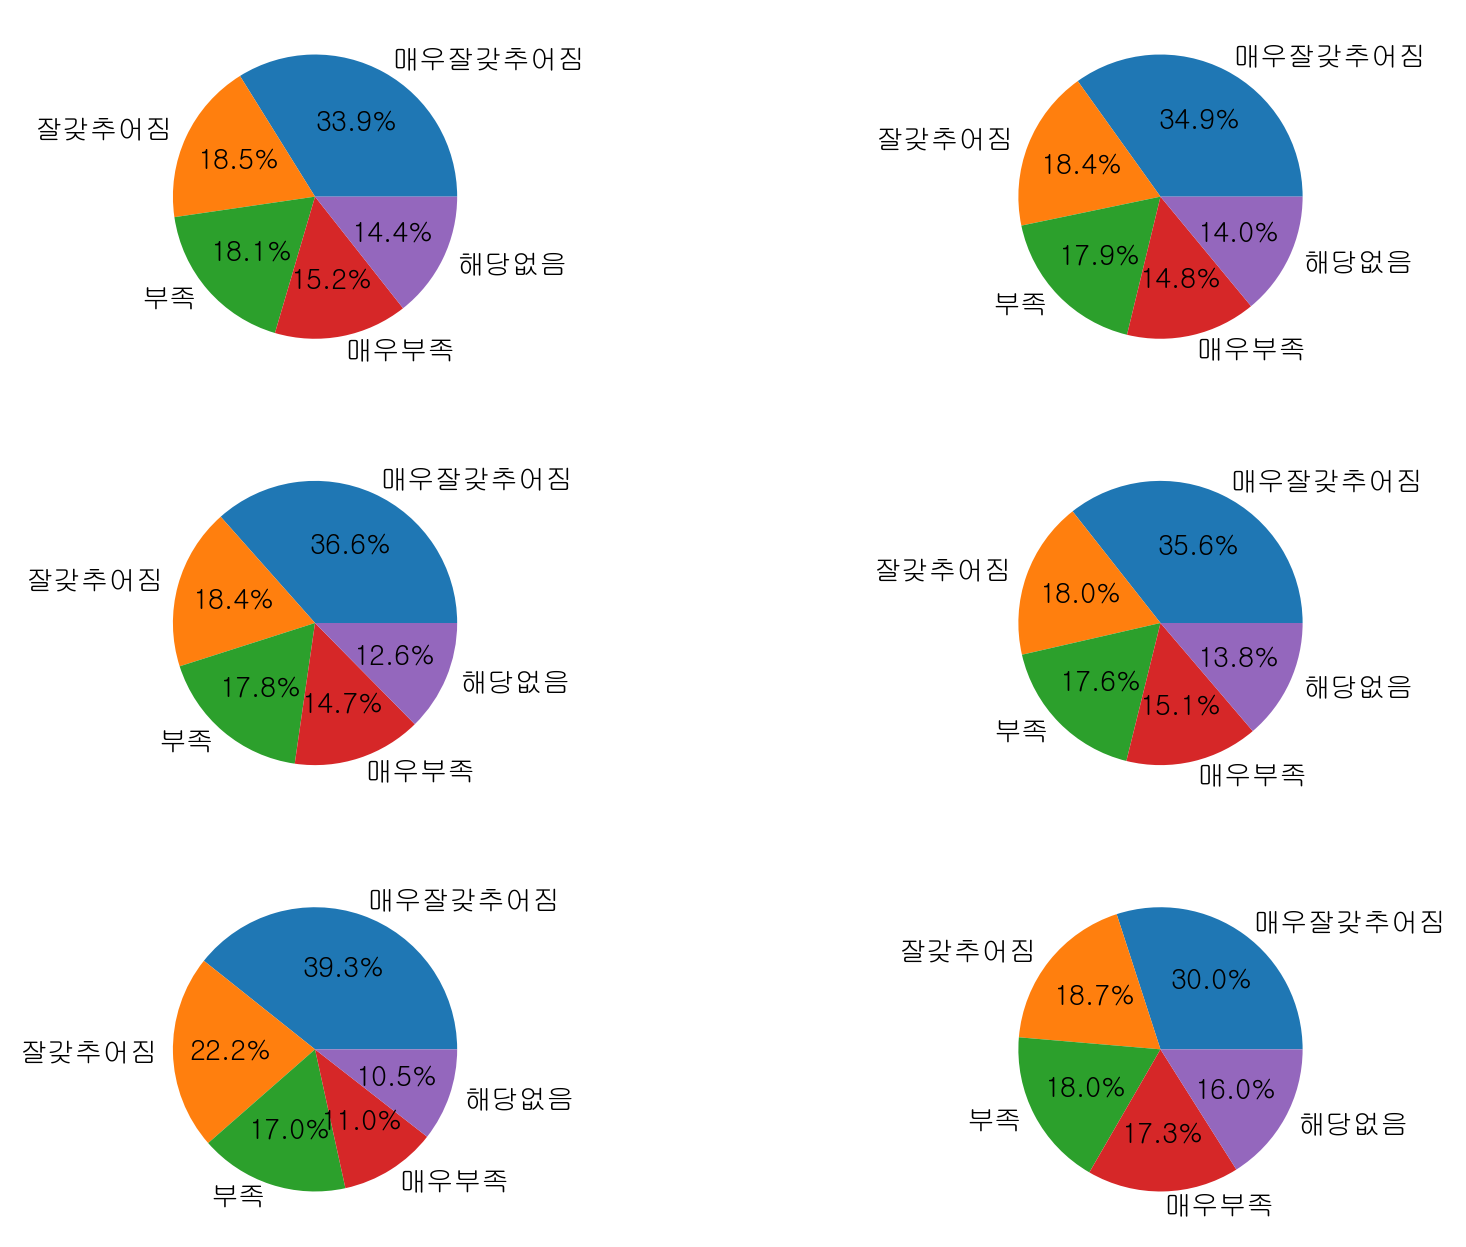

In [40]:
#잘 갖추어져 있는 것  : 가로등
#잘 갖추어져 있지 않은 것 :과속단속 카메라

fig=plt.figure(figsize=(10,8), dpi=100)
(ax1,ax2,ax3,ax4,ax5,ax6)=fig.subplots(3,2).flatten()

_=ax1.pie(data1["신호등"].value_counts(), labels=['매우잘갖추어짐', '잘갖추어짐', '부족', '매우부족','해당없음'], autopct='%.1f%%')
_=ax2.pie(data1["횡단보도"].value_counts(), labels=['매우잘갖추어짐', '잘갖추어짐', '부족', '매우부족','해당없음'], autopct='%.1f%%')
_=ax3.pie(data1["과속방지턱"].value_counts(), labels=['매우잘갖추어짐', '잘갖추어짐', '부족', '매우부족','해당없음'], autopct='%.1f%%')
_=ax4.pie(data1["안전표지판"].value_counts(), labels=['매우잘갖추어짐', '잘갖추어짐', '부족', '매우부족','해당없음'], autopct='%.1f%%')
_=ax5.pie(data1["가로등"].value_counts(), labels=['매우잘갖추어짐', '잘갖추어짐', '부족', '매우부족','해당없음'], autopct='%.1f%%')
_=ax6.pie(data1["과속단속카메라"].value_counts(), labels=['매우잘갖추어짐', '잘갖추어짐', '부족', '매우부족','해당없음'], autopct='%.1f%%')